## Adrian Zaręba | 320672

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# <span style="color:#458dc8"> Zagłębienie się w Sieci Neuronowe: Od Teorii do Zastosowań <span>

W tym dokumencie przyjrzymy się bliżej sieciom neuronowym, rozpoczynając od teoretycznych podstaw, przez praktyczną implementację podstawowych mechanizmów, aż po zastosowanie sieci w rozwiązywaniu realnych problemów klasyfikacji.

## Spis treści
1. [Opis Teoretyczny](#1-opis-teoretyczny)
2. [Bazowa Implementacja](#2-bazowa-implementacja)
3. [Implementacja Propagacji Wstecznej Błędu | Rozwój Sieci Neuronowej](#3-implementacja-propagacji-wstecznej-błędu)
4. [Implementacja Momentu i Normalizacji Gradientu](#4-implementacja-momentu-i-normalizacji-gradientu)
5. [Rozwiązywanie Zadania Klasyfikacji](#5-rozwiązywanie-zadania-klasyfikacji)
6. [Nowe funkcje aktywacji](#6-nowe-funkcje-aktywacji)
7. [Zjawisko Przeuczenia i Finalna Klasa NN](#7-zjawisko-przeuczenia)
8. [Podsumowanie](#Podsumowanie)

## <span style="color:#458dc8"> 1. Opis Teoretyczny <span>

Sieci neuronowe są zaawansowanymi narzędziami analizy danych. Składają się z połączonych ze sobą neuronów, które odbierają dane wejściowe, przetwarzają je i generują odpowiedź. Neurony te są ułożone w warstwy, gdzie każda warstwa przetwarza dane na coraz wyższym poziomie abstrakcji. Dzięki zdolności do uczenia się na podstawie danych treningowych, sieci neuronowe są w stanie rozwiązywać złożone problemy, takie jak rozpoznawanie obrazów czy przetwarzanie języka naturalnego. Ich siła leży w zdolności do wykrywania subtelnych wzorców i relacji w danych, co pozwala na efektywne modelowanie złożonych zjawisk i podejmowanie trafnych decyzji.

### Model Matematyczny Neuronu

Neurony przetwarzają informacje w sposób inspirowany działaniem ludzkiego mózgu. Model matematyczny pojedynczego neuronu można opisać w sposób uproszczony, ale dostarczający wglądu w mechanizm działania całej sieci.

$$ y = f\left(\sum_{i=1}^{n} w_i x_i + b\right) $$

### Składniki Modelu

- $y$ to wyjście neuronu, które jest wynikiem działania funkcji aktywacji $f$ na sumie ważonej sygnałów wejściowych plus bias (przesunięcie).
  
- $f$ jest funkcją aktywacji, która decyduje, czy neuron ma być aktywowany czy nie. Działa poprzez wprowadzenie nieliniowości do modelu, co pozwala sieci neuronowej na naukę złożonych wzorców i funkcji. Przykłady popularnych funkcji aktywacji to ReLU (Rectified Linear Unit), sigmoid oraz tanh (tangens hiperboliczny). Dokładniejszy opis przedstawiony w następnych rozdziałach.

- $w_i$ reprezentuje wagę i-tego wejścia. Wagi te są parametrami modelu, które są dostosowywane w procesie uczenia się sieci. Określają one, jak dużą wartość (znaczenie) ma przypisać każdemu sygnałowi wejściowemu. Wartości wag mogą być dodatnie lub ujemne, sugerując, że dany sygnał może mieć pozytywny lub negatywny wpływ na aktywację neuronu.

- $x_i$ to i-te wejście do neuronu. Może to być sygnał z danych wejściowych lub wyjście z innego neuronu w sieci. Dane wejściowe są zazwyczaj normalizowane lub skalowane, aby ułatwić proces uczenia się.

- $b$ to bias (przesunięcie), które pozwala na przesunięcie funkcji aktywacji w lewo lub prawo, co może być niezbędne do poprawnego aktywowania neuronu. Bias umożliwia neuronowi wykazywanie aktywności nawet wtedy, gdy wszystkie wejścia są równe zero.

### <span style="color:lightblue"> Przydatna rada: <span>
Uczenie się sieci neuronowej od samej strony matematycznej nie gwarantuje (przynajmniej w moim przypadku tak było) porządanego zrozumienia czym jest ten opisywany byt. Osobiście szczerze polecam przeglądnięcie internetu w celach wizualizacji teoretycznej sieci neuronowej. Proces uczenia się, działania oraz inne kwestie są świetnie prezentowane na takich serwisach jak chociażby YouTube. W przypadku polecanych kanałów proszę zgłosić się osobiście. Nie chcę w raporcie zawierać reklam internetowych.

### <span style="color:orange"> Uwaga: <span>
Klasa sieci neuronowej NN w każdym dziale ulega zmianie, przez dopisywanie odpowiednich funkcji / algorytmów / możliwości. Te fakty są opisywane w sposób teoretyczny i następnie wizualizowane na zbiorach w praktycznym zastosowaniu. Jednak podczas alteracji kodu dochodzi też do zmian już wcześniej zaimplementowanych części. Funkcje mogą różnić się zapisem, być poprawione lub dostosowane w celach radzenia sobie z nowymi implementacjami. Takie zmiany jednak nie będą wpływać na zasadę działania sieci neuronowej lecz poprawiają jedynie zapis i/lub ich zamysł. W przypadku trzech małych świnek dom z drewna a dom z cegieł są tym samym bytem jednak 'cegły są bardziej stabilne'.

P.S. 
Mocne powtórzenie algebry jest tutaj lekko mówiąc wskazane

<a id='2-bazowa-implementacja'></a>
# <span style="color:#458dc8"> 2. Bazowa Implementacja <span>

Poniżej opisywany kod umożliwia tworzenie i przetwarzanie danych przez sieć neuronową z odgórnie określoną architekturą (ilość neuronów na ilość warstw ukrytych). Główne koncepcje zawarte w tym kodzie obejmują:

- **Inicjalizacja Sieci**: Tworzony jest model sieci neuronowej na podstawie określonej architektury, wag i obciążeń (bias). Architektura obejmuje liczbę neuronów w każdej warstwie, a wagi oraz obciążenia są przekształcane do odpowiednich formatów danych.

- **Przekazywanie Sygnału**: Metoda `forward` przetwarza dane wejściowe, przekazując je przez sieć zgodnie z jej architekturą. Wykorzystuje sumę ważoną wejść, dodając obciążenie, a następnie stosuje funkcję aktywacji (w tym przypadku funkcję sigmoidalną) dla uzyskania ostatecznego wyjścia.

- **Obliczanie Błędu**: Funkcja błędu średniokwadratowego (MSE) oblicza rozbieżność między przewidywaniami sieci a rzeczywistymi etykietami. Iteruje przez warstwy ukryte, obliczając wyjścia dla każdej z nich, a następnie porównując je z oczekiwanymi wynikami.

In [2]:
# PODSTAWOWA SIEĆ NEURONOWA

class NN:
    """Klasa reprezentująca prostą sieć neuronową."""

    def __init__(self, architecture, weights, biases):
        """Inicjalizuje instancję klasy NN.
        :param architecture: Lista zawierająca rozmiary każdej warstwy sieci.
        :param weights: Lista wag dla każdej warstwy.
        :param biases: Lista obciążeń (bias) dla każdej warstwy.
        """
        self.list_of_layer_sizes = architecture
        self.weights = [np.array(w) if i == 0 or np.array(w).ndim == 2 else np.array(w).reshape(-1, 1) for i, w in enumerate(weights)]
        self.biases = biases
        self.num_of_hidden_layers = len(architecture) - 2

    def forward(self, x, Weights, Biases):
        """Przekazuje sygnał przez sieć neuronową.
        :param x: Dane wejściowe.
        :param Weights: Wagi warstwy.
        :param Biases: Obciążenia (bias) warstwy.
        :return: Wynik przekazania sygnału przez sieć.
        """
        z = np.dot(x, Weights) + Biases
        return 1 / (1 + np.exp(-z))

    def MSE(self, X, y):
        """Oblicza błąd średniokwadratowy.
        :param X: Dane wejściowe.
        :param y: Oczekiwane wyjście.
        :return: Błąd średniokwadratowy.
        """
        for i in range(self.num_of_hidden_layers):
            X = self.forward(X, self.weights[i], self.biases[i])
        Y = np.dot(X, self.weights[self.num_of_hidden_layers]) + self.biases[self.num_of_hidden_layers]
        return np.mean((Y - y) ** 2)

### <span style="color:orange"> Uwaga: <span>
### <span style="color:lightblue"> Dane <span>
### W każdym dziale będziemy pobierać dane zapisując je w odpowiednim formacie a następnie wizualizować na wykresie w celach lepszego ich zrozumienia. Ich format zależy od skryptu, gdyż nie ma odgórnej reguły zapisu inputu.

<Axes: >

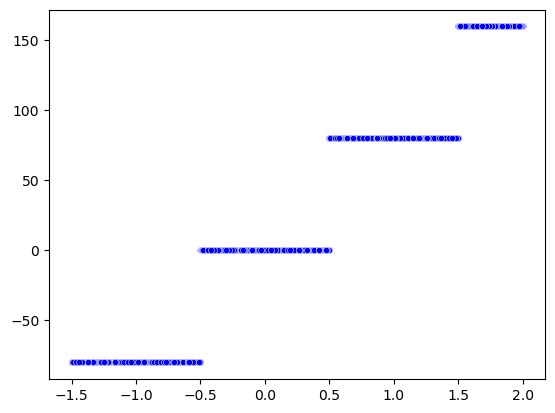

In [8]:
# DANE ORAZ ICH WIZUALIZACJA

train_data = pd.read_csv('steps-large-training.csv')
test_data = pd.read_csv('steps-large-test.csv')

X_train = train_data['x'].values.reshape(-1, 1)
y_train = train_data['y'].values.reshape(-1, 1)

X_test = test_data['x'].values.reshape(-1, 1)
y_test = test_data['y'].values.reshape(-1, 1)

X = np.vstack((X_train, X_test))
y = np.vstack((y_train, y_test))
sns.scatterplot(x=X.ravel(), y=y.ravel(), color='blue', s=20)

### Przetwarzanie danych przez sieć z zainicjowanymi parametrami oraz architekturą
Poniżej znajdują się zapisy reprezentujące ręczne ustawianie sieci neuronowych, a następnie przeprowadzanie przez nich danych i wykazywanie finalnego wyniku MSE. Dla pierwszego przykładu wagi i biasy zostawały dobrane przez zewnętrzny algorytm (napisany przeze mnie, dlatego nie wykazujący najlepszych rezultatów, jednak stosunkowo wystarczających) oraz drugie podejście, z ręczną inicjalizacją wag i biasów. W tym drugim przypadku parametry zostały wybrane dzięki aktywnej wizualizacji funkcji oraz wielu testów. Zadanie mogące się wydawać z początku zbędne, jednak poprawiające zrozumienie działania bytu sieci neuronowych. Póki co jednak zależy nam na zrozumieniu konceptu sieci neuronowych.

## I Dobieranie parametrów przez algorytm zewnętrzny

Approx final MSE: 0.2906057900763656
Weights | Biases


[[array([[ 0.05693342, -4.13511602,  4.13648637, -8.06386586, -3.74357708,
          -3.76624504, -3.56090327, -6.2098795 ,  5.40186331, -5.70721337]]),
  array([[ 50.78795147],
         [121.91821175],
         [101.40121809],
         [-16.96373431],
         [-54.95422148],
         [-33.6482471 ],
         [-49.55996905],
         [139.73816892],
         [147.67327543],
         [-30.35033238]])],
 [array([  2.59744682,  -3.29337622,  -4.86425735,   3.03280681,
           6.39025371,   4.374702  ,   5.86973407,  -8.62666727,
         -10.01664202,   4.15535197]),
  array([1.50241894])]]

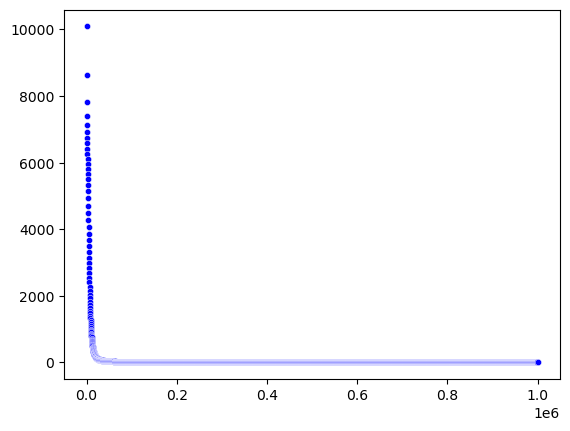

In [ ]:
#mlp_get_param = NN(architecture=[1, 10, 1])
#mlp_get_param.train(X_train, y_train, learn_rate=0.00001, epochs= 1000000)
#mlp_get_param.plot_training_process()
#mlp_get_param.get_param()

""" Implementacja dodatkowego wykresu uczenia się modelu w celach osiągnięcia pożądanych wyników.
    Proces treningu oraz działania algorytmu opisany zostanie w następnych działach. Póki co
    skupiamy się jedynie na zainicjalizowanych wagach i biasach."""

Weights | Biases
Weights | Biases
Epoch 0, MSE: 0.29055202221353515


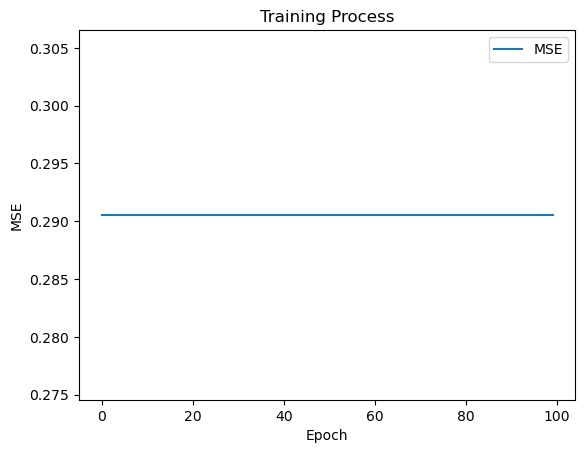

In [ ]:
#weights = mlp_get_param.get_param()[0]
#biases = mlp_get_param.get_param()[1]

#mlp_no_backward = NN(architecture=[1, 10, 1], weights=weights, biases=biases)
#mlp_no_backward.train(X_train, y_train, epochs= 100)
#mlp_no_backward.plot_training_process()
# Plot w celach zaledwie demonstracyjnych

## II Ręczne dobieranie parametrów

In [5]:
# DOBÓR WAG ORAZ BIASÓW | WYNIK MODELU
# W przypadku modelu bez zaimplementowanego mechanizmu uczenia się wagi oraz biasy muszą zostać
# zainicjalizowane na samym początku albo przez algorytm, albo ręcznie.
# jak widzimy po finalnym wyniku MSE: 1.176, parametry zostały dobrane prawidłowo.

weights=[
    [[2000, 2000, 2000, 0, 0, 0, 0, 0, 0, 0]],
    [80, 80, 80, 0, 0, 0, 0, 0, 0, 0]
] 

biases=[
    [1000, -1000, -3000, 0, 0, 0, 0, 0, 0, 0],
    [-80]
]

mlp_no_backward = NN([1, 10, 1], weights, biases)
mlp_no_backward.MSE(X, y)

C:\Users\zareb\AppData\Local\Temp\ipykernel_19864\434100305.py:25: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


1.1758273039231273

## <span style="color:lightblue"> Pierwsze wnioski <span>
Implementacja sieci neuronowych po wystarczającym zrozumieniu może być stosunkowo prosta. Podczas pisania kodu można odnieść wrażenie tworzenia prostego organizmu. Łatwo też zauważyć skąd się bierze nazwa neuron dla tych sieci oraz jaką mogą mieć potęgę obliczeniową.
Należy jednak pamiętać, że to dopiero początek...

<a id='3-implementacja-propagacji-wstecznej-błędu'></a>

# <span style="color:#458dc8"> 3. Implementacja Propagacji Wstecznej Błędu | Rozwój Sieci Neuronowej </span>

Propagacja wsteczna to algorytm wykorzystywany do uczenia sieci neuronowych poprzez minimalizację funkcji straty. Jest to proces, w którym wagi i biasy w sieci neuronowej są aktualizowane, aby zminimalizować błąd predykcji.

### Proces wykonania

1. **Przekazanie sygnału:** Na początku, dane wejściowe są przekazywane przez sieć neuronową, a każda warstwa oblicza swoje wyjście na podstawie wag i biasów. ('Zwykły' wcześniej opisany forward)

2. **Obliczenie błędu:** Następnie obliczany jest błąd predykcji, porównując rzeczywiste wartości z wartościami przewidywanymi przez sieć.

3. **Propagacja wsteczna:** W tej fazie błąd jest propagowany z powrotem przez sieć, począwszy od ostatniej warstwy aż do pierwszej. Podczas tej propagacji wstecznej, wagi i biasy są aktualizowane zgodnie z gradientem funkcji straty.

4. **Aktualizacja wag i biasów:** Wagi i biasy są aktualizowane przez odjęcie iloczynu gradientu funkcji straty i współczynnika uczenia od ich obecnych wartości. Dla każdej wagi $w_i$ aktualizacja jest przeprowadzana według wzoru: $w_i = w_i - \eta \cdot \frac{\partial L}{\partial w_i}$, a dla każdego biasu $b$: $b = b - \eta \cdot \frac{\partial L}{\partial b}$, gdzie $\eta$ oznacza współczynnik uczenia.

### Obliczanie gradientu funkcji straty

Gradient funkcji straty to wektor, który wskazuje kierunek najszybszego wzrostu funkcji straty. W propagacji wstecznej, obliczamy gradient funkcji straty względem każdej wagi i biasu, aby określić, jak bardzo zmiana w danej wadze lub biasie wpływa na wartość funkcji straty.

#### Gradient wag $\frac{\partial L}{\partial w_i}$

Gradient wag mówi nam, jak bardzo zmiana wagi $w_i$ wpłynie na wartość funkcji straty $L$. Obliczany jest jako iloczyn trzech czynników:

1. $\frac{\partial L}{\partial y}$ - Częściowa pochodna funkcji straty $L$ względem wyjścia warstwy.
2. $\frac{\partial y}{\partial z}$ - Częściowa pochodna wyjścia warstwy $y$ względem sumy ważonej wejść.
3. $\frac{\partial z}{\partial w_i}$ - Częściowa pochodna sumy ważonej wejść $z$ względem wagi $w_i$.

Aktualizacja wagi $w_i$ jest realizowana przez odjęcie iloczynu obliczonego gradientu i współczynnika uczenia $\eta$ od obecnej wartości wagi: $w_i = w_i - \eta \cdot \frac{\partial L}{\partial w_i}$.

#### Gradient biasu $\frac{\partial L}{\partial b}$

Gradient biasu pokazuje, jak zmiana biasu wpłynie na wartość funkcji straty $L$. Jest obliczany podobnie do gradientu wag, ale odnosi się do biasu: $b = b - \eta \cdot \frac{\partial L}{\partial b}$. W obu przypadkach, obliczając te częściowe pochodne, stosujemy regułę łańcuchową, aby obliczyć całkowity gradient.

#### <span style="color:lightblue"> W tym przypadku szczególnie polecam zrozumienie reguły łańcuchowej oraz zachęcam do wizualizacji propagacji wstecznej (ponownie wspomnę serwic YouTube) </span>

Size of the Square Simple: 100
Size of the Multimodal Large: 10000


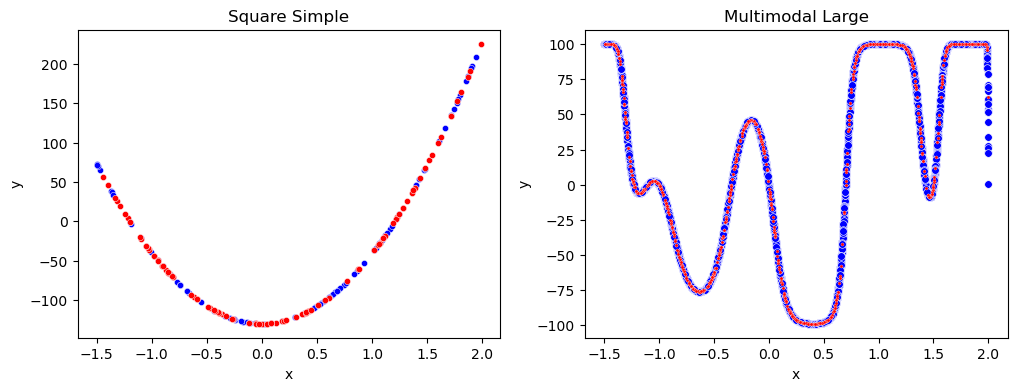

In [9]:
# Pobieranie danych

""" Wizualizacja danych, w celu zrozumienia struktur.
    Czerwonym kolorem widzimy zbiory testowe, a niebieskim - treningowe. """

square_simple_test = pd.read_csv('square-simple-test.csv')[['x', 'y']]
square_simple_train = pd.read_csv('square-simple-training.csv')[['x', 'y']]
Square_Simple_Test_X, Square_Simple_Test_y = square_simple_test['x'].values.reshape(-1, 1), square_simple_test['y'].values.reshape(-1, 1)
Square_Simple_Train_X, Square_Simple_Train_y = square_simple_train['x'].values.reshape(-1, 1), square_simple_train['y'].values.reshape(-1, 1)

multimodal_large_test = pd.read_csv('multimodal-large-test.csv')[['x', 'y']]
multimodal_large_train = pd.read_csv('multimodal-large-training.csv')[['x', 'y']]
ML_Test_X, ML_Test_y = multimodal_large_test['x'].values.reshape(-1, 1), multimodal_large_test['y'].values.reshape(-1, 1)
ML_Train_X, ML_Train_y = multimodal_large_train['x'].values.reshape(-1, 1), multimodal_large_train['y'].values.reshape(-1, 1)


print(f'Size of the Square Simple: {len(square_simple_train)}')
print(f'Size of the Multimodal Large: {len(multimodal_large_train)}')

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.scatterplot(data=square_simple_train, x='x', y='y', ax=axes[0], color='blue', s=20)
sns.scatterplot(data=square_simple_test, x='x', y='y', ax=axes[0], color='red', s=20)
axes[0].set_title('Square Simple')

sns.scatterplot(data=multimodal_large_train, x='x', y='y', ax=axes[1], color='blue', s=30)
sns.scatterplot(data=multimodal_large_test, x='x', y='y', ax=axes[1], color='red', s=5)
axes[1].set_title('Multimodal Large')

plt.show()

### <span style="color:#458dc8"> Rozwój Sieci Neuronowej NN </span>
Od tej chwili zostały wprowadzone zmiany i nowa struktura klasy NN, która lepiej będzie sobie radzić z implementacją dodatkowych funkcji oraz samej w sobie wizualizacją.

Wprowadzone zmiany to dodanie możliwości wyboru nowych funkcji aktywacji, wcześniej był tylko sigmoid (niezdefiniowany lecz sam w sobie wprowadzony w forward). Zmiany pozwalają na większą elastyczność i lepszą adaptację sieci do specyficznych rodzajów danych i problemów.

### Funkcje aktywacji i ich pochodne
W ramach nowej struktury, sieć neuronowa NN wspiera teraz trzy główne typy funkcji aktywacji:
- **Sigmoid**
- **ReLU**
- **Liniowa**

### Inicjalizacja wag
One są kluczone głównie przy starcie zwłaszcza gdy mamy jeszcze normalizację:
- **Xavier**: Zapobiega problemowi znikających lub eksplodujących gradientów na wczesnym etapie uczenia.
- **He**: Optymalna dla sieci z funkcją aktywacji ReLU, przyspiesza konwergencję.
- **Uniform**: Prosta, równomierna inicjalizacja, która może być użyteczna w niektórych przypadkach.

Dobór odpowiedniej metody inicjalizacji wag jest istotny dla efektywności i szybkości uczenia sieci.

### Standaryzacja danych
Standaryzacja (normalizacja) danych wejściowych jest ważna, ponieważ ułatwia uczenie przez zapewnienie, że dane mają podobną skalę. To poprawia stabilność i szybkość.

### Wizualizacja ewolucji wag
Funkcja `plot_weights` pozwala na wizualne śledzenie, jak wagi sieci ewoluują w czasie uczenia.

### Batch processing
Przetwarzanie danych w partii (batches) umożliwia efektywniejsze i stabilniejsze uczenie sieci przez równomierniejsze aktualizacje wag, a także pomaga w zarządzaniu pamięcią przy dużych zbiorach danych.

### <span style="color:lightblue"> Backpropagation <span>
Wspomniany opisowo wyżej.

### <span style="color:#458dc8"> Zalterowana klasa NN </span>

In [8]:
# Funkcje aktywacji i ich pochodne
activation_functions = {
    'sigmoid': lambda z: 1 / (1 + np.exp(-z)),
    'linear': lambda z: z,
    'relu' : lambda z: np.maximum(0, z)
}

derivative_activation_functions = {
    "sigmoid": lambda x: x * (1 - x),
    "linear": lambda x: 1,
    "relu": lambda x: (x > 0).astype(float)
}

# Funkcje inicjalizacji wag
initialization_functions = {
    'xavier': lambda n_in, n_out=None: np.random.normal(0, np.sqrt(1. / n_out if n_out is not None else 1. / n_in), (n_in, n_out) if n_out is not None else n_in),
    'he': lambda n_in, n_out=None: np.random.normal(0, np.sqrt(2. / n_in), (n_in, n_out) if n_out is not None else n_in),
    'uniform': lambda n_in, n_out=None: np.random.uniform(0, 1, (n_in, n_out) if n_out is not None else n_in),
}

# Klasa reprezentująca sztuczną sieć neuronową
class NN:
    def __init__(self, architecture, activations='sigmoid', initalization='uniform'):
        """
        Inicjalizacja sztucznej sieci neuronowej.
        Parameters:
        architecture (list): Lista liczby neuronów w każdej warstwie.
        activations (str): Rodzaj funkcji aktywacji używanej we wszystkich warstwach poza ostatnią.
        initialization (str): Metoda inicjalizacji wag.
        """
        self.architecture = architecture
        self.num_layers = len(architecture)
        self.training_process = [[], []]  # Przechowywanie procesu uczenia
        self.weights_history = []         # Historia wag

        # Wybór funkcji inicjalizacji wag
        self.init_function = initialization_functions[initalization]
        # Inicjalizacja wag i obciążeń
        self.weights = [self.init_function(architecture[i-1], architecture[i]) for i in range(1, self.num_layers)]
        self.biases = [self.init_function(architecture[i]) for i in range(1, self.num_layers)]

        # Wybór funkcji aktywacji
        self.activations = [activations for i in range(1, self.num_layers - 1)] + ['linear']
        self.activation_funcs = list(map(lambda x: activation_functions.get(x), [activations for i in range(1, self.num_layers - 1)] + ['linear']))

    def record_weights(self):
        """Zapisuje bieżące wagi sieci."""
        self.weights_history.append([w.copy() for w in self.weights])

    def forward(self, a, return_activations=False):
        """
        Przekazuje dane przez sieć w kierunku od wejścia do wyjścia.
        Parameters:
        a (numpy.ndarray): Wejście sieci.
        return_activations (bool): Określa, czy zwracać aktywacje na każdej warstwie.
        Returns:
        numpy.ndarray: Wyjście sieci.
        """        
        activations = [a] if return_activations else None
        
        for w, b, func in zip(self.weights, self.biases, self.activation_funcs):
            a = func(np.dot(a, w)+b)
            if return_activations:
                activations.append(a)
        return activations if return_activations else a
    
    def MSE(self, X, y, denormalize=None):
        """
        Oblicza błąd średniokwadratowy (Mean Squared Error) dla danych wejściowych i oczekiwanych wyjść.
        Parameters:
        X (numpy.ndarray): Dane wejściowe.
        y (numpy.ndarray): Oczekiwane wyjścia.
        denormalize (tuple): Tuple zawierający parametry do denormalizacji danych.
        Returns:
        float: Błąd średniokwadratowy.
        """
        predictions = self.forward(X)
        if denormalize:
            predictions = destandardize_data(predictions, denormalize)
        return np.mean((predictions - y) ** 2)

    def backward(self, X, y, learning_rate):
        """Propagacja wsteczna, zwraca pochodne częściowe."""
        activations = self.forward(X, return_activations=True)
        deltas = [None] * len(self.weights)
        deltas[-1] = activations[-1] - y.reshape(-1, 1)
        
        for i in reversed(range(len(deltas) - 1)):
            if self.activations[i] == "sigmoid":
                deltas[i] = np.dot(deltas[i+1], self.weights[i+1].T) * derivative_activation_functions['sigmoid'](activations[i+1])
            elif self.activations[i] == "linear":
                deltas[i] = np.dot(deltas[i+1], self.weights[i+1].T)
            elif self.activations[i] == 'relu':
                deltas[i] = np.dot(deltas[i+1], self.weights[i+1].T) * derivative_activation_functions['relu'](activations[i+1])
        
        length = len(self.weights)
        weights_gradient = [None] * length
        biases_gradient = [None] * length
        
        for i in range(length):
            weights_gradient[i] = np.dot(activations[i].T, deltas[i])
            biases_gradient[i] = np.sum(deltas[i], axis=0)
        
        m = len(X)
        for i in range(len(self.weights)):
            self.weights[i] -= (learning_rate/m) * weights_gradient[i]
            self.biases[i] -= (learning_rate/m) * biases_gradient[i]

    def create_batches(self, X, y, batch_size):
        """
        Tworzy batche danych wejściowych i oczekiwanych wyjść.
        Parameters:
        X (numpy.ndarray): Dane wejściowe.
        y (numpy.ndarray): Oczekiwane wyjścia.
        batch_size (int): Rozmiar batcha.
        Returns:
        tuple: Tuple zawierający batche danych wejściowych i oczekiwanych wyjść.
        """
        size = len(X)
        indices = np.arange(size)
        np.random.shuffle(indices)
        
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        
        X_mini_batches = [X_shuffled[i:i+batch_size] for i in range(0, size, batch_size)]
        y_mini_batches = [y_shuffled[i:i+batch_size] for i in range(0, size, batch_size)]
        return X_mini_batches, y_mini_batches

    def train(self, X, y, X_test, y_test, learning_rate=0.001, epochs=10000, batch_size=None, denormalize=None, update_rate=200):
        """
        Trenuje sieć neuronową.
        Parameters:
        X (numpy.ndarray): Dane treningowe.
        y (numpy.ndarray): Oczekiwane wyjścia dla danych treningowych.
        X_test (numpy.ndarray): Dane testowe.
        y_test (numpy.ndarray): Oczekiwane wyjścia dla danych testowych.
        learning_rate (float): Współczynnik uczenia.
        epochs (int): Liczba epok.
        batch_size (int): Rozmiar batcha.
        denormalize (tuple): Tuple zawierający parametry do denormalizacji danych.
        update_rate (int): Częstotliwość aktualizacji wyników. (Przyczynia się do czasu działania)
        """
        if batch_size is None:
            batch_size = len(X)
        y_mse = y
        if denormalize is not None:
            y_mse = destandardize_data(y, denormalize)

        # Do wizualizacji procesu
        field_width = 8
        
        for epoch in range(1, epochs+1):
            if batch_size < len(X):
                batches_x, batches_y = self.create_batches(X, y, batch_size)
                for i in range(len(batches_x)):
                    self.backward(batches_x[i], batches_y[i], learning_rate)
            else:
                self.backward(X, y, learning_rate)
                
            if (epochs%update_rate) == 0:
                self.record_weights()
                loss = self.MSE(X, y_mse, denormalize=denormalize)
                loss_test = self.MSE(X_test, y_test, denormalize=denormalize)
                self.training_process[0].append(epoch)
                self.training_process[1].append(loss)
                print(f"MSE_Test: {loss_test:>{field_width}.2f} | MSE_Train: {loss:>{field_width}.2f} | Percentage: {((epoch/epochs)*100):>{field_width}.2f}%", end='\r')


    # Funkcje wizualizacyjne
    def plot_combined(self, X, parameters, data):
        """
        Wyświetla wykresy predykcji oraz procesu trenowania.
        Parameters:
        X (numpy.ndarray): Dane wejściowe.
        """
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        predictions = []
        for x in X:
            predictions.append(self.forward(x)[-1])
        predictions = self.forward(X)
        if X.ndim > 1:
            X = X[:, 0]
        
        # Na zielono predykcje, na czerwono dane trenujące
        predictions = destandardize_data(np.squeeze(predictions), parameters)
        sns.scatterplot(x=X, y=predictions, color='green', s=20, ax=axes[0])
        sns.scatterplot(data=data, x='x', y='y', ax=axes[0], color='red', s=10)

        axes[0].set_title('Predictions')

        if len(self.training_process[0]) == 0:
            print('You need to train model')
        else:
            sns.scatterplot(x=self.training_process[0], y=self.training_process[1], color='blue', s=20, ax=axes[1])
            axes[1].set_title('Training Process')

        plt.tight_layout()
        plt.show()

    def plot_weights(self):
        """Wizualizuje ewolucję wag w czasie."""
        if not self.weights_history:
            print("No weights history to plot. Train the model to generate history.")
            return
        fig, axs = plt.subplots(len(self.weights), 1, figsize=(10, len(self.weights) * 3))
        if len(self.weights) == 1:
            axs = [axs]
        for i, ax in enumerate(axs):
            weights_layer_i = np.array([weights[i].flatten() for weights in self.weights_history])
            sns.heatmap(weights_layer_i.T, ax=ax, cmap='viridis', cbar=True)
            ax.set_title(f'Layer {i+1} Weights Over Epochs')
            ax.set_xlabel('Epoch')
            ax.set_ylabel('Weight Index')
        
        plt.tight_layout()
        plt.show()

def standardize_data(X):
    """Standaryzuje dane."""
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_new = (X - mean) / std
    return X_new, (mean, std)

def destandardize_data(X, parameters):
    """Denormalizuje dane."""
    return X * parameters[1] + parameters[0]

### Implementacja oraz wizualizacja na podstawie uprzednio pobranych danych

#### Opis przeprowadzanych analiz:
##### Każdy z modeli zostaje uczony z różnymi parametrami, (learning rate, epochs, batch size, inicjalizacja wag). Jako pierwsze widzimy wyniki uczenia, czyli MSE dla zbioru testowego, MSE dla treningowego oraz procent stanu uczenia (do relatywizacji wymaganego czasu). Patrząc się na te wartości jako pierwsze były dokonywane zmiany. Kiedy najbardziej znacząca wartość, MSE_Test, pojawiła się na satysfakcjonującym poziomie przechodziliśmy do wizualizacji procesu. Pierwszy wykres 'Predictions' pokazuje porównanie przewidywanych danych ze zbioru testowego do danych ze zbioru treningowego (dzięki temu widzimy jak ułożyła się funkcja i czy istniały potencjalne outliery). Drugi wykres, Training Process, wyświetla zależność wartości MSE od epoch, czyli jak w następnych iteracjach zmieniał się błąd średniokwadratowy (Wykres powinien być stale malejący, przy skaczących mocno wartościach możemy wywnioskować, że zmienne uczące mogły zostać błędnie dobrane. Najczęśniej w tym przypadku jest to wynik za dużego learning rate). Ostatni wykres pokazuje zmianę wag w kolejnych iteracjach. Tutaj płynność zmian też definiuje poprawny proces. Analizujemy też procesu uczenia 'bawiąc się' inicjalizacją wag i doborem batch.

## Square Simple

In [12]:
# Uczymy model z uniform jako metoda inicjalizacji wag
square = NN([1,10,1])
y_norm, parameters_square = standardize_data(Square_Simple_Train_y)
square.train(Square_Simple_Train_X, y_norm, Square_Simple_Test_X, Square_Simple_Test_y, 
             learning_rate=0.5, epochs=10000, denormalize=parameters_square)

In [ ]:
# Uczymy model z He jako metoda inicjalizacji wag
square = NN([1,10,1], initalization='he')
y_norm, parameters_square = standardize_data(Square_Simple_Train_y)
square.train(Square_Simple_Train_X, y_norm, Square_Simple_Test_X, Square_Simple_Test_y, 
             learning_rate=0.5, epochs=10000, denormalize=parameters_square)

In [ ]:
# Uczymy model z Xavier jako metoda inicjalizacji wag
square = NN([1,10,1], initalization='xavier')
y_norm, parameters_square = standardize_data(Square_Simple_Train_y)
square.train(Square_Simple_Train_X, y_norm, Square_Simple_Test_X, Square_Simple_Test_y, 
             learning_rate=0.5, epochs=10000, denormalize=parameters_square)

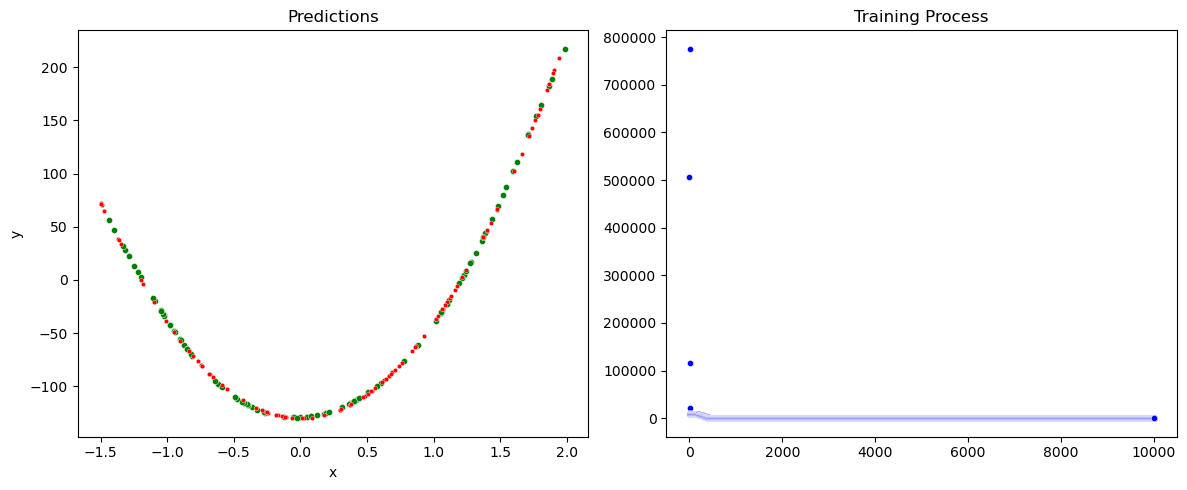

In [ ]:
# Na zielono predykcje, na czerwono dane trenujące
square.plot_combined(Square_Simple_Test_X, parameters_square, square_simple_train)

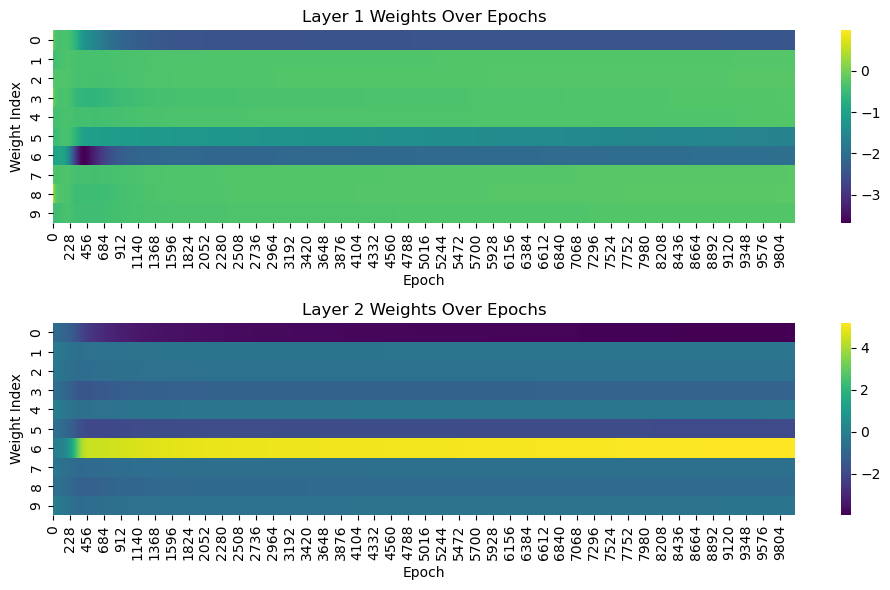

In [ ]:
# Wizualizacja zmian wag w czasie (kolejne epoch)
square.plot_weights()

##### Średnio inicjalizacja He prowadziła do najlepszych wyników

In [ ]:
# batch size = 20
square = NN([1,10,1], initalization='he')
y_norm, parameters_square = standardize_data(Square_Simple_Train_y)
square.train(Square_Simple_Train_X, y_norm, Square_Simple_Test_X, Square_Simple_Test_y, 
             learning_rate=0.5, epochs=10000, denormalize=parameters_square, batch_size=20)

In [ ]:
# batch size = 50
square = NN([1,10,1], initalization='he')
y_norm, parameters_square = standardize_data(Square_Simple_Train_y)
square.train(Square_Simple_Train_X, y_norm, Square_Simple_Test_X, Square_Simple_Test_y, 
             learning_rate=0.5, epochs=10000, denormalize=parameters_square, batch_size=50)

##### Zmiana parametru batch wpływa na czas potrzebny do uczenia oraz może prowadzić do niestabilnego spadku MSE. Wyniki jednak są bardzo satysfakconujące

## Multimodal Large

##### Poznawszy strukturę działania modeli z różnymi parametrami możemy z przewidywanymi schematami dobrać odpowiednie wartości by wytrenować nasz model. Jest on jednak dużo bardziej skomplikowany i liczniejszy, przez co będzie wymagał więcej czasu do trenowania.

In [ ]:
ml = NN([1,10,10,1], initalization='he')
y_norm_ml, parameters_ml = standardize_data(ML_Train_y)
ml.train(ML_Train_X, y_norm_ml, ML_Test_X, ML_Test_y, learning_rate=0.2, epochs=200000, denormalize=parameters_ml)
# MSE test oscylował z zakresu 25 - 50

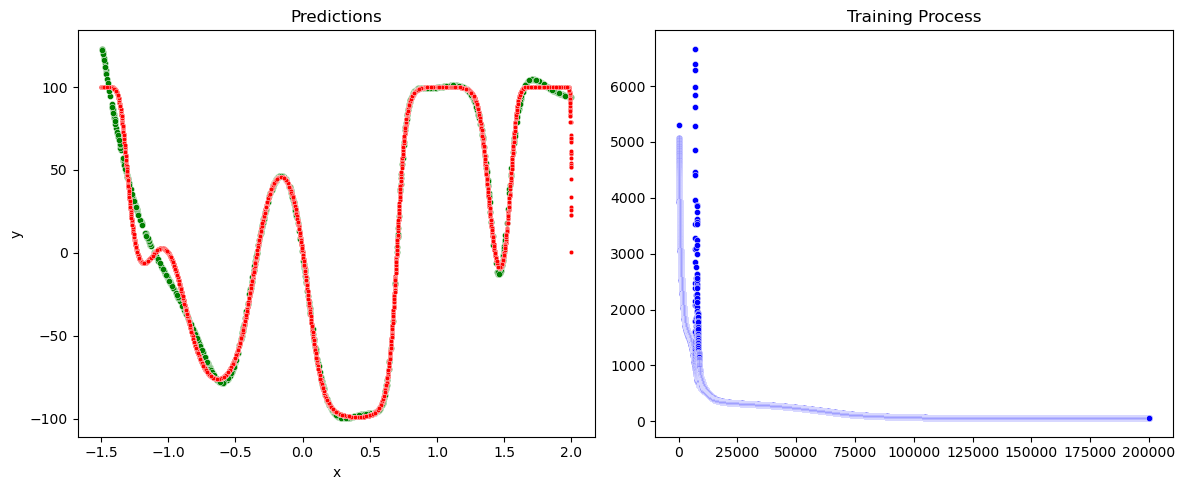

In [ ]:
ml.plot_combined(ML_Test_X, parameters_ml, multimodal_large_train)

#### Jak można zauważyć po wynikach propagacja wsteczna zaimplementowana z odpowiednimi metodami jest w stanie bardzo dobrze sobie poradzić z konkretnymi zbiorami danych. Nie zmienia to jednak faktu, że to nie koniec możliwości poprawienia możliwości sieci i 'szerokości' tematów ich zastosowań

## <span style="color:lightblue">  Wnioski | Moje odczucia </span>
Pomimo powszechnej opinii o braku jednoznacznej reguły wyznaczania parametrów, po pisaniu tych skryptów oraz analizie działania całej klasy NN czy też wizualizacja outputów można się przekonać, że nie do końca jest to prawda. Bazując na bardziej rozbudowanych danych wielowymiarowych nie jesteśmy w stanie 'wyobrazić' sobie tego procesu, jednak uprzednia analiza danych może podsunąć pewien trop przez co z każdym następnym krokiem wiemy jakie działania podjąć by poprawić rezultat. Co zwiększyć, co zmniejszyć.

## <span style="color:#458dc8"> 4. Implementacja Momentu i Normalizacji Gradientu</span>


Size of the Square Large: 1000
Size of the Steps Large: 10000


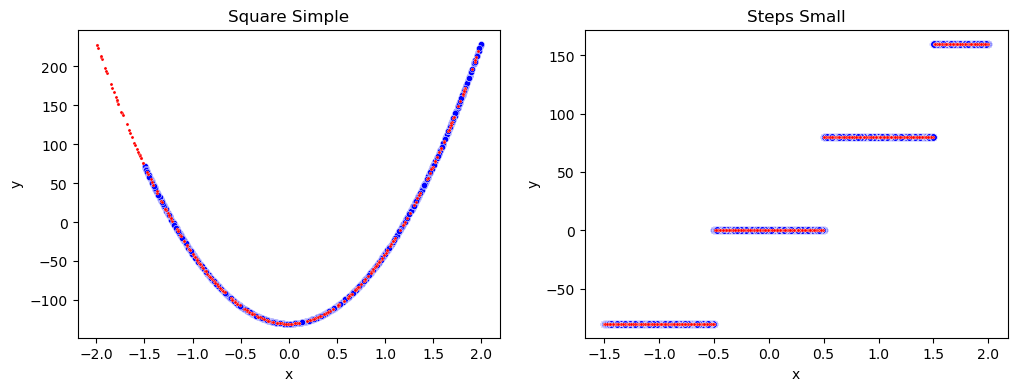

In [11]:
# Dane
square_large_test = pd.read_csv('square-large-test.csv')[['x', 'y']]
square_large_train = pd.read_csv('square-large-training.csv')[['x', 'y']]
Square_Large_Test_X, Square_Large_Test_y = square_large_test['x'].values.reshape(-1, 1), square_large_test['y'].values.reshape(-1, 1)
Square_Large_Train_X, Square_Large_Train_y = square_large_train['x'].values.reshape(-1, 1), square_large_train['y'].values.reshape(-1, 1)

steps_large_test = pd.read_csv('steps-large-test.csv')[['x', 'y']]
steps_large_train = pd.read_csv('steps-large-training.csv')[['x', 'y']]
Steps_Large_Test_X, Steps_Large_Test_y = steps_large_test['x'].values.reshape(-1, 1), steps_large_test['y'].values.reshape(-1, 1)
Steps_Large_Train_X, Steps_Large_Train_y = steps_large_train['x'].values.reshape(-1, 1), steps_large_train['y'].values.reshape(-1, 1)

print(f'Size of the Square Large: {len(square_large_train)}')
print(f'Size of the Steps Large: {len(steps_large_train)}')

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.scatterplot(data=square_large_train, x='x', y='y', ax=axes[0], color='blue', s=20)
sns.scatterplot(data=square_large_test, x='x', y='y', ax=axes[0], color='red', s=5)
axes[0].set_title('Square Simple')

sns.scatterplot(data=steps_large_train, x='x', y='y', ax=axes[1], color='blue', s=30)
sns.scatterplot(data=steps_large_test, x='x', y='y', ax=axes[1], color='red', s=5)
axes[1].set_title('Steps Small')

plt.show()

### <span style="color:#458dc8"> Rozwój Sieci Neuronowej NN </span>
Klasa NN została udoskonalona o nowe mechanizmy adaptacyjne, które poprawiają stabilność i przyspieszają proces uczenia sieci neuronowej. Szczególnie warte uwagi są Moment i Normalizacja gradientu RMSProp.

### Moment
Moment to technika, która pomaga w przyspieszeniu gradientu spadkowego w odpowiednim kierunku i wygładza oscylacje. Mechanizm ten można porównać do kuli toczącej się po powierzchni, która gromadzi pęd i przez to porusza się płynniej.

#### Matematyczna postać Momentu:
$v_{t} = \beta v_{t-1} + (1 - \beta) \cdot \nabla_{\theta}J(\theta)$
$\theta = \theta - \alpha \cdot v_{t}$

Gdzie:
- $v_{t}$ to prędkość w chwili $t$,
- $\beta$ to współczynnik momentu,
- $\nabla_{\theta}J(\theta)$ to gradient funkcji kosztu względem parametrów $\theta$,
- $\alpha$ to tempo uczenia.

### RMSProp
RMSProp jest techniką adaptacyjnego tempa uczenia, która modyfikuje tempo uczenia dla każdego parametru, pozwalając na szybszą i bardziej stabilną konwergencję w procesie uczenia.

#### Matematyczna postać RMSProp:
$s_{t} = \beta s_{t-1} + (1 - \beta) \cdot (\nabla_{\theta}J(\theta))^2$
$\theta = \theta - \frac{\alpha}{\sqrt{s_{t} + \epsilon}} \cdot \nabla_{\theta}J(\theta)$

Gdzie:
- $s_{t}$ to kumulatywna średnia kwadratów gradientów w chwili $t$,
- $\beta$ to współczynnik zapominania (zwykle bliski 1),
- $\epsilon$ mała wartość zapobiegająca dzieleniu przez zero (np. $10^{-8}$),
- Pozostałe oznaczenia są takie same jak w poprzednim wzorze.

### Dalsze ulepszenia
Te ulepszenia to tylko część z wielu innowacji wprowadzonych do klasy NN, włączając w to lepszą inicjalizację wag, funkcje aktywacji, standaryzację danych, czy przetwarzanie danych w partii. Wszystkie te zmiany mają na celu stworzenie bardziej elastycznej, efektywnej i wydajnej sieci neuronowej.

### <span style="color:lightblue"> Znaczenie Backpropagation z Momentem i RMSProp <span>
Algorytm propagacji wstecznej (backpropagation) zyskuje na znaczeniu dzięki wprowadzeniu momentu i RMSProp. Te techniki pozwalają na inteligentniejsze i bardziej zrównoważone aktualizacje wag, co prowadzi do szybszej konwergencji i lepszej ogólnej wydajności sieci.



### <span style="color:lightblue"> NN <span>

In [12]:
# Funkcje aktywacji i ich pochodne
activation_functions = {
    'sigmoid': lambda z: 1 / (1 + np.exp(-z)),
    'linear': lambda z: z,
    'relu' : lambda z: np.maximum(0, z)
}

derivative_activation_functions = {
    "sigmoid": lambda x: x * (1 - x),
    "linear": lambda x: 1,
    "relu": lambda x: (x > 0).astype(float)
}

# Funkcje inicjalizacji wag
initialization_functions = {
    'xavier': lambda n_in, n_out=None: np.random.normal(0, np.sqrt(1. / n_out if n_out is not None else 1. / n_in), (n_in, n_out) if n_out is not None else n_in),
    'he': lambda n_in, n_out=None: np.random.normal(0, np.sqrt(2. / n_in), (n_in, n_out) if n_out is not None else n_in),
    'uniform': lambda n_in, n_out=None: np.random.uniform(0, 1, (n_in, n_out) if n_out is not None else n_in),
}

# Klasa reprezentująca sztuczną sieć neuronową
class NN:
    def __init__(self, architecture, activations='sigmoid', initalization='uniform'):
        """
        Inicjalizacja sztucznej sieci neuronowej.
        Parameters:
        architecture (list): Lista liczby neuronów w każdej warstwie.
        activations (str): Rodzaj funkcji aktywacji używanej we wszystkich warstwach poza ostatnią.
        initialization (str): Metoda inicjalizacji wag.
        """
        self.architecture = architecture
        self.num_layers = len(architecture)
        self.training_process = [[], []]  # Przechowywanie procesu uczenia
        self.weights_history = []  # Historia wag

        # Wybór funkcji inicjalizacji wag
        self.init_function = initialization_functions[initalization]
        # Inicjalizacja wag i biasów
        self.weights = [self.init_function(architecture[i-1], architecture[i]) for i in range(1, self.num_layers)]
        self.biases = [self.init_function(architecture[i]) for i in range(1, self.num_layers)]

        # Kojarzy mi się z velocity dla momentum. Inicjalizacja też tutaj dla RMSProp
        self.s_weights = [np.zeros_like(w) for w in self.weights]
        self.s_biases = [np.zeros_like(b) for b in self.biases]

        # Wybór funkcji aktywacji
        self.activations = [activations for i in range(1, self.num_layers - 1)] + ['linear']
        self.activation_funcs = list(map(lambda x: activation_functions.get(x), [activations for i in range(1, self.num_layers - 1)] + ['linear']))


    def record_weights(self):
        """Zapisuje bieżące wagi sieci."""
        self.weights_history.append([w.copy() for w in self.weights])


    def forward(self, a, return_activations=False):
        """
        Przekazuje dane przez sieć w kierunku od wejścia do wyjścia.
        Parameters:
        a (numpy.ndarray): Wejście sieci.
        return_activations (bool): Określa, czy zwracać aktywacje na każdej warstwie.
        Returns:
        numpy.ndarray: Wyjście sieci.
        """
        def compute_step(a, w, b, func):
            z = np.dot(a, w) + b
            return func(z)
        
        activations = [a] if return_activations else None
        
        for w, b, func in zip(self.weights, self.biases, self.activation_funcs):
            a = compute_step(a, w, b, func)
            if return_activations:
                activations.append(a)
        
        return activations if return_activations else a
    

    def MSE(self, X, y, denormalize=None):
        """
        Oblicza błąd średniokwadratowy dla danych wejściowych i oczekiwanych wyjść.
        Parameters:
        X (numpy.ndarray): Dane wejściowe.
        y (numpy.ndarray): Oczekiwane wyjścia.
        denormalize (tuple): Tuple zawierający parametry do denormalizacji danych.
        Returns:
        float: Błąd średniokwadratowy.
        """
        predictions = self.forward(X)
        if denormalize:
            predictions = destandardize_data(predictions, denormalize)
        return np.mean((predictions - y) ** 2)


    def backward(self, X, y, learning_rate, sigma, beta, epsilon):
        """Propagacja wsteczna"""
        # sigma: szybkość dla momentum
        # beta: współczynnik zapominania dla RMSProp
        # epsilon: anty-zero
        activations = self.forward(X, return_activations=True)
        deltas = [None] * len(self.weights)
        deltas[-1] = activations[-1] - y.reshape(-1, 1)
        
        for i in reversed(range(len(deltas) - 1)):
            delta_func = derivative_activation_functions[self.activations[i]]
            deltas[i] = np.dot(deltas[i+1], self.weights[i+1].T) * delta_func(activations[i+1])
        
        length = len(self.weights)
        weights_gradient = [None] * length
        biases_gradient = [None] * length
        
        for i in range(length):
            weights_gradient[i] = np.dot(activations[i].T, deltas[i])
            biases_gradient[i] = np.sum(deltas[i], axis=0)

        if sigma is None:
            sigma = 0
                
        m = len(X)
        for i in range(len(self.weights)):
            weights_gradient = np.dot(activations[i].T, deltas[i])
            biases_gradient = np.sum(deltas[i], axis=0)
            # Aktualizacja wag
            if beta is not None:
                # RMSProp
                # Tutaj learning rate nie jest dzielony przez len(X). Wygodniej i sprawniej bez tego
                self.s_weights[i] = beta * self.s_weights[i] + (1 - beta) * np.square(weights_gradient)
                self.s_biases[i] = beta * self.s_biases[i] + (1 - beta) * np.square(biases_gradient)
                self.weights[i] -= (learning_rate / ((np.sqrt(self.s_weights[i] + epsilon)))) * weights_gradient
                self.biases[i] -= (learning_rate / ((np.sqrt(self.s_biases[i] + epsilon)))) * biases_gradient
            else:
                # Momentum
                self.s_weights[i] = sigma * self.s_weights[i] + (1 - sigma) * weights_gradient
                self.s_biases[i] = sigma * self.s_biases[i] + (1 - sigma) * biases_gradient
                self.weights[i] -= (learning_rate / m) * self.s_weights[i]
                self.biases[i] -= (learning_rate / m) * self.s_biases[i]


    def create_batches(self, X, y, batch_size):
        """
        Tworzy batche danych wejściowych i oczekiwanych wyjść.
        Parameters:
        X (numpy.ndarray): Dane wejściowe.
        y (numpy.ndarray): Oczekiwane wyjścia.
        batch_size (int): Rozmiar batcha.
        Returns:
        tuple: Tuple zawierający batche danych wejściowych i oczekiwanych wyjść.
        """
        size = len(X)
        indices = np.arange(size)
        np.random.shuffle(indices)
        # Tutaj wsadzamy procent, jeżeli nie znamy wielkości zbioru
        if batch_size <= 1:
            batch_size = round(size*batch_size)
        
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        
        X_mini_batches = [X_shuffled[i:i+batch_size] for i in range(0, size, batch_size)]
        y_mini_batches = [y_shuffled[i:i+batch_size] for i in range(0, size, batch_size)]
        return X_mini_batches, y_mini_batches
    

    def train(self, X, y, X_test, y_test, denormalize=None,       # Dane
              learning_rate=0.01, epochs=10000, batch_size=None,  # Podstawowe zmienne
              velocity=None, beta=None, epsilon=1e-8,             # Zmienne dla gradientów
              target=None, update_rate=1):                        # Dodatkowe
        """
        Trenuje sieć neuronową.
        Parameters:
        X (numpy.ndarray): Dane treningowe.
        y (numpy.ndarray): Oczekiwane wyjścia dla danych treningowych.
        X_test (numpy.ndarray): Dane testowe.
        y_test (numpy.ndarray): Oczekiwane wyjścia dla danych testowych.
        learning_rate (float): Współczynnik uczenia.
        epochs (int): Liczba epok.
        batch_size (int): Rozmiar batcha.
        denormalize (tuple): Tuple zawierający parametry do denormalizacji danych.
        target (float): Wartość MSE na której chcemy zakończyć uczenie.
        update_rate (int): Częstotliwość aktualizacji wyników. (Przyczynia się do czasu działania)
        velocity (float): Parametr kontrolujący tempo i kierunek aktualizacji wag
        beta (float): Parametr dla RMSProp
        epsilon (float): anty-zero
        """

        if velocity is not None and beta is not None:
            print('You need to choose between simple momentum and RMSProp')
            return
        
        if batch_size is None:
            batch_size = len(X)
        
        y_mse = y
        if denormalize is not None:
            y_mse = destandardize_data(y, denormalize)

        # Do wizualizacji procesu. W print ważne przy określaniu dokładności wyświetlanych wyników
        field_width = 8
    
        try:
            for epoch in range(1, epochs+1):
                if batch_size < len(X):
                    batches_x, batches_y = self.create_batches(X, y, batch_size)
                    for i in range(len(batches_x)):
                        self.backward(batches_x[i], batches_y[i], learning_rate, velocity, beta, epsilon)
                else:
                    self.backward(X, y, learning_rate, velocity, beta, epsilon)
                    
                if (epoch % update_rate) == 0 or epoch == epochs:
                    self.record_weights()
                    loss = self.MSE(X, y_mse, denormalize=denormalize)
                    loss_test = self.MSE(X_test, y_test, denormalize=denormalize)
                    self.training_process[0].append(epoch)
                    self.training_process[1].append(loss)
                    print(f"MSE_Test: {loss_test:>{field_width}.2f} | MSE_Train: {loss:>{field_width}.2f} | Percentage: {((epoch/epochs)*100):>{field_width}.2f}%", end='\r')
                if target is not None:
                    if loss_test <= target:
                        return
        except KeyboardInterrupt:
            print("\nTraining interrupted. Finalizing...")
        finally:
            print("Training complete.")
            print(f"Final MSE: {loss_test:>{field_width-3}.2f}", end='\r')



    # Funkcje wizualizacyjne
    def plot_combined(self, X, parameters, data):
        """
        Wyświetla wykresy predykcji oraz procesu trenowania.
        Parameters:
        X (numpy.ndarray): Dane wejściowe.
        """
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        predictions = []
        for x in X:
            predictions.append(self.forward(x)[-1])
        predictions = self.forward(X)
        if X.ndim > 1:
            X = X[:, 0]
        # Na zielono predykcje, na czerwono dane trenujące
        predictions = destandardize_data(np.squeeze(predictions), parameters)
        sns.scatterplot(x=X, y=predictions, color='green', s=20, ax=axes[0])
        sns.scatterplot(data=data, x='x', y='y', ax=axes[0], color='red', s=10)

        axes[0].set_title('Predictions')

        if len(self.training_process[0]) == 0:
            print('You need to train model')
        else:
            sns.scatterplot(x=self.training_process[0], y=self.training_process[1], color='blue', s=20, ax=axes[1])
            axes[1].set_title('Training Process')

        plt.tight_layout()
        plt.show()


    def plot_weights(self):
        """Wizualizuje ewolucję wag w czasie."""
        if not self.weights_history:
            print("No weights history to plot. Train the model to generate history.")
            return
        
        fig, axs = plt.subplots(len(self.weights), 1, figsize=(10, len(self.weights) * 3))
        if len(self.weights) == 1:
            axs = [axs]
        
        for i, ax in enumerate(axs):
            weights_layer_i = np.array([weights[i].flatten() for weights in self.weights_history])
            sns.heatmap(weights_layer_i.T, ax=ax, cmap='viridis', cbar=True)
            ax.set_title(f'Layer {i+1} Weights Over Epochs')
            ax.set_xlabel('Epoch')
            ax.set_ylabel('Weight Index')
        
        plt.tight_layout()
        plt.show()

def standardize_data(X):
    """Standaryzuje dane."""
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_new = (X - mean) / std
    return X_new, (mean, std)

def destandardize_data(X, parameters):
    """Denormalizuje dane."""
    return X * parameters[1] + parameters[0]

## Implementacja
### Testy | Analizy przebiegu uczenia | Finalne modele

# Uczenie sieci neuronowej

Oprócz danych treningowych i testowych, dostajemy możliwość wprowadzenia parametrów uczenia, w tym trzy nowe. Są to: 

### Podstawowe:
- **learning rate** (domyślnie ustawiony na 0.01)
- **epochs** (domyślnie na 10000)
- **batch_size** (None)

### Nowe parametry:
- **velocity**
  - Parametr w metodzie momentów w sieciach neuronowych kontrolujący tempo i kierunek aktualizacji wag, biorąc pod uwagę poprzednie kroki. Dzięki temu algorytm może szybciej i stabilniej zbliżać się do optymalnego rozwiązania podczas procesu uczenia. Stąd nazwa 'velocity'.

- **beta**
  - W algorytmie RMSProp, parametr beta kontroluje stopień, w jakim historia kwadratów gradientów jest zapominana. Jest to współczynnik zapominania, który określa, jak wiele uwagi należy poświęcić poprzednim wartościom kwadratów gradientów w porównaniu z bieżącą iteracją.

- **epsilon**
  - Parametr epsilon jest dodany do mianownika w celu zapobieżenia dzieleniu przez zero i zapewnia numeryczną stabilność algorytmu. Jest to mała wartość dodatnia, zazwyczaj około 1e-8, która zapobiega dzieleniu przez zero w przypadku, gdy mianownik byłby bliski zeru. Dodanie epsilon pomaga również uniknąć problemów z numeryczną niestabilnością, które mogą wystąpić podczas obliczania pierwiastka kwadratowego.


# Steps Large

In [ ]:
# Zaczniemy od momentum
steps = NN([1, 5, 5, 1], initalization='he', activations='sigmoid')
y_norm_steps, parameters_steps = standardize_data(Steps_Large_Train_y)

steps.train(Steps_Large_Train_X, y_norm_steps, Steps_Large_Test_X, Steps_Large_Test_y, denormalize=parameters_steps,
            learning_rate=1, epochs = 50000, batch_size=0.4, 
            velocity=0.9)
# Spadek MSE jest dużo bardziej płynny

Training complete. | MSE_Train:    28.49 | Percentage:   100.00%


In [ ]:
# RMSProp
steps = NN([1, 5, 5, 1], initalization='he', activations='sigmoid')
y_norm_steps, parameters_steps = standardize_data(Steps_Large_Train_y)

steps.train(Steps_Large_Train_X, y_norm_steps, Steps_Large_Test_X, Steps_Large_Test_y, denormalize=parameters_steps,
            learning_rate=0.01, epochs = 50000, batch_size=0.4, 
            beta=0.9)

MSE_Test:     6.40 | MSE_Train:     7.03 | Percentage:    77.03%
Training interrupted. Finalizing...
Training complete.


##### Po chwili uczenia zauważyć można było bardzo szybki spadek wartości MSE, jednak tylko do pewnego poziomu, co następnie zatrzymywało się i oscylowało wokół pewnych wartości. Z tego powodu powstał dodatkowy parametr 'target', służący do zatrzymywania procesu uczenia przy osiągnięciu pożądanych wartości MSE. Tutaj jednak na pewno co do wniosków trzeba zauważyć, że dużo dokładniej należy dobierać parametry dla RMSProp w porównaniu do momentum.

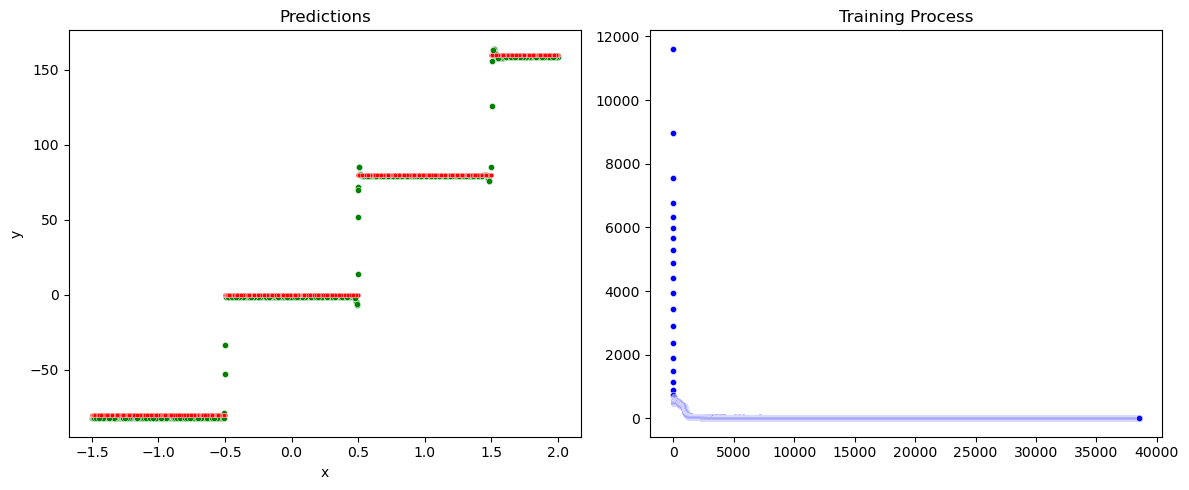

In [ ]:
steps.plot_combined(Steps_Large_Test_X, parameters_steps, steps_large_train)

#### Steps Large | MSE < 3

In [ ]:
# RMSProp
steps = NN([1, 5, 5, 1], initalization='he', activations='sigmoid')
y_norm_steps, parameters_steps = standardize_data(Steps_Large_Train_y)

steps.train(Steps_Large_Train_X, y_norm_steps, Steps_Large_Test_X, Steps_Large_Test_y, denormalize=parameters_steps,
            learning_rate=0.01, epochs = 50000, batch_size=0.1, 
            beta=0.9, epsilon=1e-8,
            target=3)

Training complete. | MSE_Train:     4.99 | Percentage:    40.34%


# Square Large

In [ ]:
square = NN([1, 5, 1], initalization='xavier')
y_norm_square, parameters_square = standardize_data(Square_Large_Train_y)
square.train(Square_Large_Train_X, y_norm_square, Square_Large_Test_X, Square_Large_Test_y, denormalize=parameters_square, 
             learning_rate=1, epochs=400000, batch_size=0.2,
             velocity=0.8)
# Czas średnio do osiągnięcia wartości MSE test równej około 3 wynosił na tej metodzie 8 min.
# Co ciekawe inicjalizacja xavier tutaj jest bardziej wydajniejsza w porównaniu do poprzedniego zbioru, gdzie dominował he.

MSE_Test:    33.75 | MSE_Train:     0.07 | Percentage:     4.67%
Training interrupted. Finalizing...
Training complete.


##### Tym razem RMSProp

In [ ]:
square = NN([1, 5, 1], initalization='xavier')
y_norm_square, parameters_square = standardize_data(Square_Large_Train_y)
square.train(Square_Large_Train_X, y_norm_square, Square_Large_Test_X, Square_Large_Test_y, denormalize=parameters_square, 
             learning_rate=0.01, epochs=1000000, batch_size=0.2,
             beta=0.9,
             target=2)
# Dużo lepiej sobie dał radę, ale kolejne wnioski.... na końcu zostaną przedstawione.

Training complete. | MSE_Train:     0.38 | Percentage:     4.68%


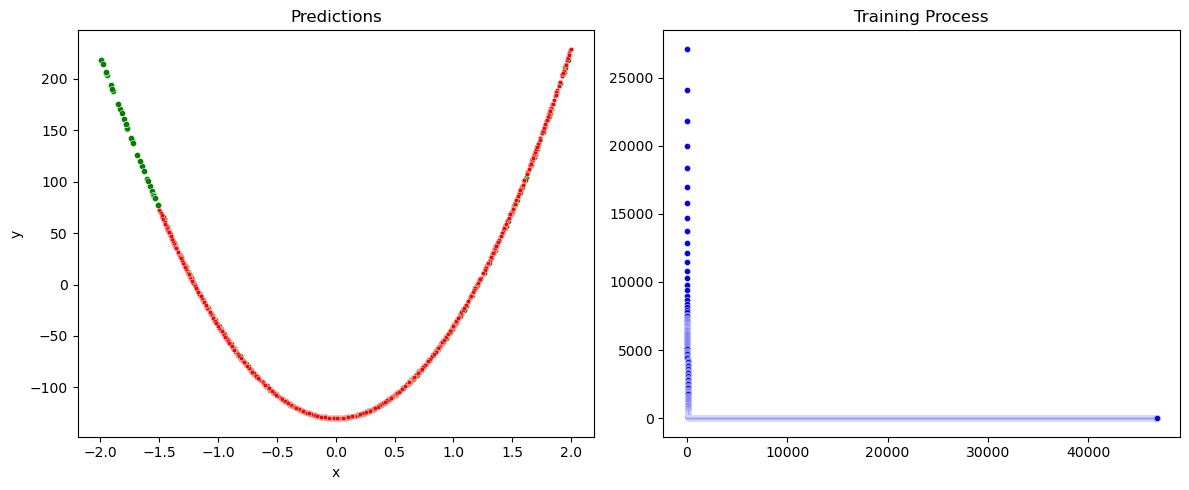

In [ ]:
square.plot_combined(Square_Large_Test_X, parameters_square, square_large_train)

#### Square Large | MSE < 1

In [ ]:
# RMSProp
square = NN([1, 5, 1], initalization='xavier')
y_norm_square, parameters_square = standardize_data(Square_Large_Train_y)
square.train(Square_Large_Train_X, y_norm_square, Square_Large_Test_X, Square_Large_Test_y, denormalize=parameters_square, 
             learning_rate=0.01, epochs=1000000, batch_size=0.05,
             beta=0.9,
             target=1)

Training complete. | MSE_Train:     0.88 | Percentage:     1.08%


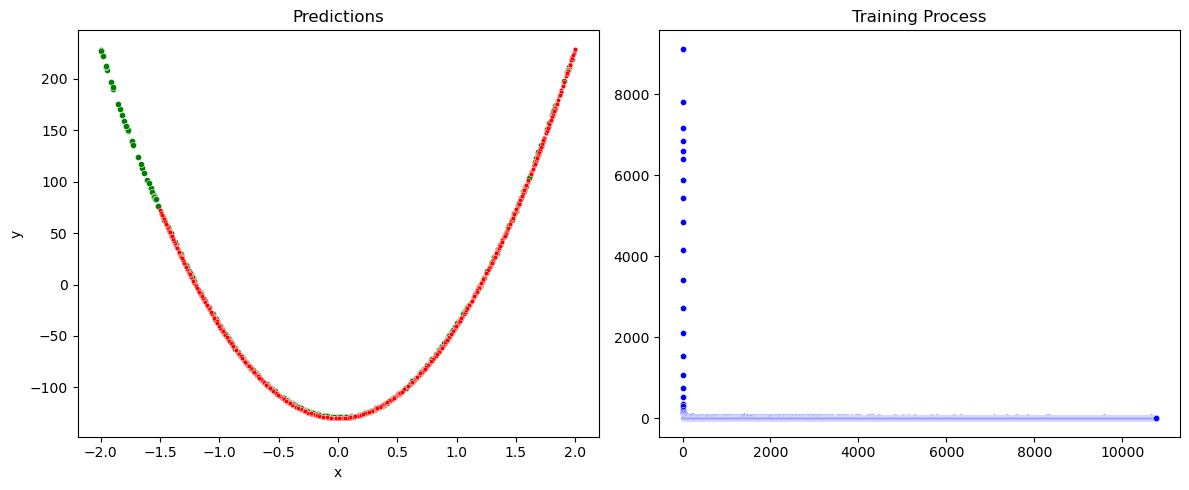

In [ ]:
square.plot_combined(Square_Large_Test_X, parameters_square, square_large_train)

# Multimodal Large

In [ ]:
ml = NN([1, 10, 10, 1], initalization='he')
y_norm_ml, parameters_ml = standardize_data(ML_Train_y)
ml.train(ML_Train_X, y_norm_ml, ML_Test_X, ML_Test_y, denormalize=parameters_ml,
         learning_rate=0.01, epochs=50000, batch_size=0.1,
         beta=0.9,
         target=9)

# Minuta działania. RMSProp zrobił tutaj niewiarygodną różnicę.

Training complete. | MSE_Train:    12.17 | Percentage:    10.90%


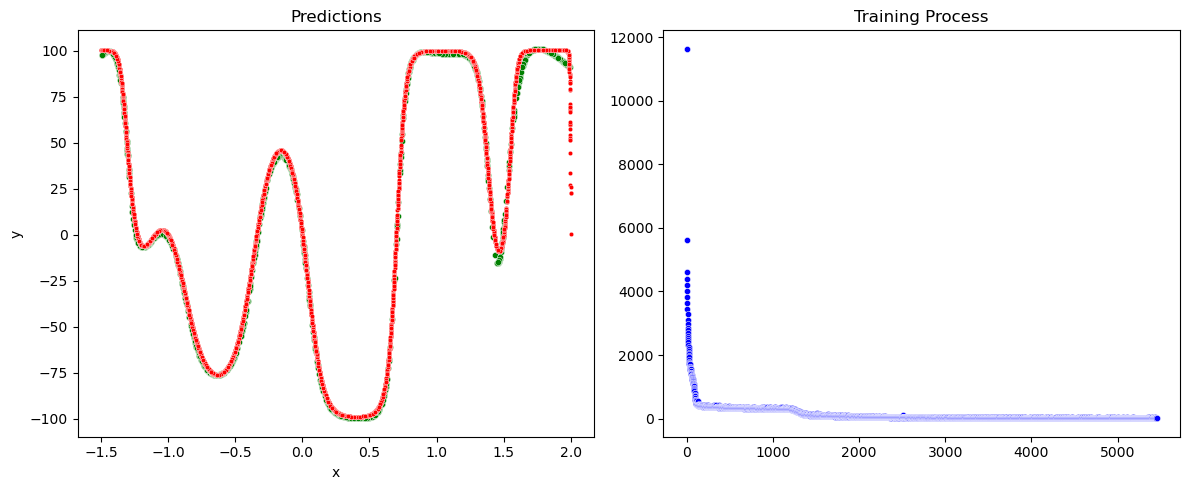

In [ ]:
ml.plot_combined(ML_Test_X, parameters_ml, multimodal_large_train)

#### Multimodal Large | MSE < 3

In [ ]:
# RMSProp
ml = NN([1, 10, 10, 1], initalization='he')
y_norm_ml, parameters_ml = standardize_data(ML_Train_y)
ml.train(ML_Train_X, y_norm_ml, ML_Test_X, ML_Test_y, denormalize=parameters_ml,
         learning_rate=1, epochs=50000, batch_size=0.4,
         velocity=0.9)
# Dla momentum uczenie się przebiegało dużo wolniej ale na pewno bardziej stabilnie

Training complete. | MSE_Train:     7.12 | Percentage:   100.00%


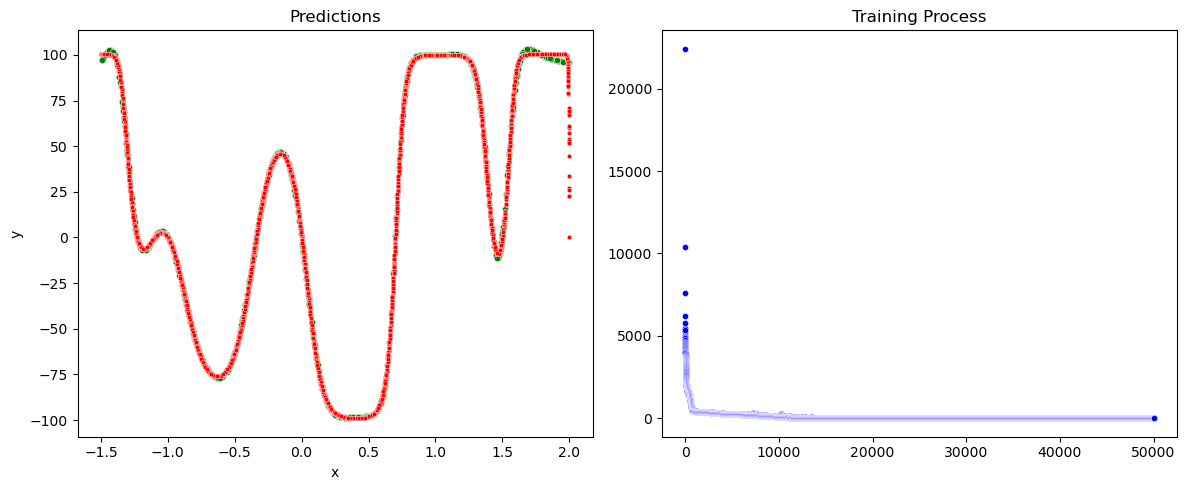

In [ ]:
ml.plot_combined(ML_Test_X, parameters_ml, multimodal_large_train)

### <span style="color:lightblue">  Wnioski | Moje odczucia </span>
Zdecydowanie największe wrażenie wzbudziło zwiększenie efektywności. Nie napotykałem się tym razem przy testach oraz doborach parametrów na 'utknięcia' (Zjawisko opisywane z matematycznego punktu widzenia jako zatrzymanie się w minimum lokalnym, nie globalnym. W praktyce oscylacja dla pewnych parametrów zwłaszcza dla bardziej wrażliwej RMSProp mogła występować, jednak finalnie zbiegała do coraz mniejszych wartości dla MSE, co wcześniej nie miało miejsca.) w pewnej chwili trenowania a całość przeprowadzana była dużo szybciej. Zauważalna podczas testów była jednak różnica między sposobem uczenia przy momentum i RMSProp. Momentum działał dużo stabilniej, jednak mimo wszystko wolniej. Była to metoda dużo prostsza do testowania, gdyż dobór parametrów zdawał się być bardziej intuicyjny. RMSProp natomiast wymagał większej uwagi i nie zachowywał się już tak płynnie ale zapewniał dużo szybsze uczenie. RMSProp wywoływał we mnie wrażenie bardziej zdolnego do 'adaptacji'. W powyższych skryptach i testach dla RMSProp wymagany był mniejszy batch_size (opisana przyczyna wyżej). Trzy modele dla trzech różnych zbiorów danych finalnie zbiegały do żądanych wartości MSE.

## <span style="color:#458dc8"> 5. Rozwiązywanie Zadania Klasyfikacji </span>

Size of the Easy: 500
Size of the Rings3 Regular: 1500
Size of the Xor3: 500


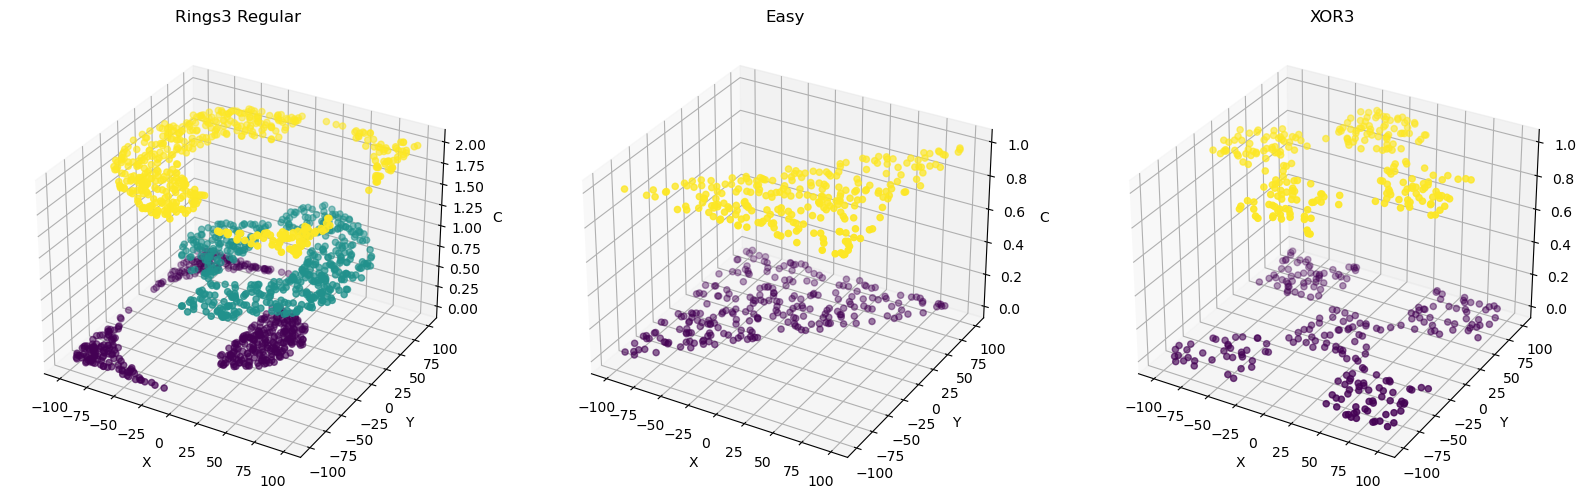

In [4]:
# DANE
easy_test = pd.read_csv('easy-test.csv')[['x', 'y', 'c']]
easy_train = pd.read_csv('easy-training.csv')[['x', 'y', 'c']]
easy_train_x, easy_train_y, easy_train_c = easy_train['x'].values.reshape(-1, 1), easy_train['y'].values.reshape(-1, 1), easy_train['c'].values.reshape(-1, 1)
easy_test_x, easy_test_y, easy_test_c = easy_test['x'].values.reshape(-1, 1), easy_test['y'].values.reshape(-1, 1), easy_test['c'].values.reshape(-1, 1)

rings3_regular_test = pd.read_csv('rings3-regular-test.csv')[['x', 'y', 'c']]
rings3_regular_test_x, rings3_regular_test_y, rings3_regular_test_c = rings3_regular_test['x'].values.reshape(-1, 1), rings3_regular_test['y'].values.reshape(-1, 1), rings3_regular_test['c'].values.reshape(-1, 1)
rings3_regular_train = pd.read_csv('rings3-regular-training.csv')[['x', 'y', 'c']]
rings3_regular_train_x, rings3_regular_train_y, rings3_regular_train_c = rings3_regular_train['x'].values.reshape(-1, 1), rings3_regular_train['y'].values.reshape(-1, 1), rings3_regular_train['c'].values.reshape(-1, 1)

xor3_test = pd.read_csv('xor3-test.csv')[['x', 'y', 'c']]
xor3_test_x, xor3_test_y, xor3_test_c = xor3_test['x'].values.reshape(-1, 1), xor3_test['y'].values.reshape(-1, 1), xor3_test['c'].values.reshape(-1, 1)
xor3_train = pd.read_csv('xor3-training.csv')[['x', 'y', 'c']]
xor3_train_x, xor3_train_y, xor3_train_c = xor3_train['x'].values.reshape(-1, 1), xor3_train['y'].values.reshape(-1, 1), xor3_train['c'].values.reshape(-1, 1)

print(f'Size of the Easy: {len(easy_train)}')
print(f'Size of the Rings3 Regular: {len(rings3_regular_train)}')
print(f'Size of the Xor3: {len(xor3_train)}')

def plot_3d_subplot(ax, x, y, c, title='3D Plot'):
    scatter = ax.scatter(x, y, c, c=c, cmap='viridis', marker='o')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('C')
    ax.set_title(title)

fig, axes = plt.subplots(1, 3, figsize=(20, 10), subplot_kw={'projection': '3d'})

plot_3d_subplot(axes[0], rings3_regular_train_x, rings3_regular_train_y, rings3_regular_train_c, title='Rings3 Regular')
plot_3d_subplot(axes[1], easy_train_x, easy_train_y, easy_train_c, title='Easy')
plot_3d_subplot(axes[2], xor3_train_x, xor3_train_y, xor3_train_c, title='XOR3')

plt.show()

### Następnie w celach klasyfikacji danych zmienimy podejście w ich przetwarzaniu, stosując One-Hot Encoding 

In [13]:
def one_hot_encode(y):
    return pd.get_dummies(y, dtype=int).to_numpy()

XY_easy_train = easy_train[['x', 'y']].to_numpy()
c_easy_train = one_hot_encode(easy_train['c'])
XY_easy_test = easy_test[['x', 'y']].to_numpy()
c_easy_test = one_hot_encode(easy_test['c'])

XY_rings3_regular_train = rings3_regular_train[['x', 'y']].to_numpy()
c_rings3_regular_train = one_hot_encode(rings3_regular_train['c'])
XY_rings3_regular_test = rings3_regular_test[['x', 'y']].to_numpy()
c_rings3_regular_test = one_hot_encode(rings3_regular_test['c'])

XY_xor3_train = xor3_train[['x', 'y']].to_numpy()
c_xor3_train = one_hot_encode(xor3_train['c'])
XY_xor3_test = xor3_test[['x', 'y']].to_numpy()
c_xor3_test = one_hot_encode(xor3_test['c'])

## Czym jest klasyfikacja?

"Klasyfikacja to proces przypisywania etykiet kategorialnych do danych wejściowych." W kontekście uczenia maszynowego, jest to zadanie, w którym model przewiduje kategorię, do której należy dane wejście. Na przykład, sieć neuronowa może klasyfikować obrazy zwierząt jako 'pies' lub 'kot'.

## Matematyczne podstawy klasyfikacji

Dla klasyfikacji często używa się funkcji aktywacji softmax, która przekształca liczby rzeczywiste na prawdopodobieństwa przynależności do poszczególnych klas:

$$ \text{Softmax}(z_i) = \frac{e^{z_i}}{\sum_{j} e^{z_j}} $$

Gdzie:
- \(z_i\) to wartość w wektorze logitów dla klasy i-tej, (Logit to po prostu wartość wyjściowa z modelu, zanim zostanie przekształcona na prawdopodobieństwo)
- Mianownik to suma eksponentów wszystkich logitów, co normalizuje wyjście do zakresu [0,1], gdzie suma wszystkich prawdopodobieństw równa się 1.

## Zmiany w kodzie dla klasyfikacji

W kodzie sieci neuronowej zaimplementowałem kilka zmian, aby umożliwić klasyfikację:

1. **Dodanie funkcji aktywacji softmax:** Funkcja ta jest używana na ostatniej warstwie sieci neuronowej, gdy model jest przeznaczony do klasyfikacji. Zapewnia, że wyjście można interpretować jako rozkład prawdopodobieństwa na kategorie.

2. **Funkcja straty dla klasyfikacji:** Dla regresji używaliśmy błędu średniokwadratowego (MSE), ale dla klasyfikacji dobrze sprawdza się entropia krzyżowa, która mierzy różnicę między prawdziwym rozkładem prawdopodobieństwa a tym przewidzianym przez model. 
Bazując na teorii, "Error Term for Output Layer" możemy zauważyć, że powyższy kod spełnia wymagane kryteria, z uwagi na przedstawione zależności (u nas f'(output) = 1, bo mieliśmy na tym funkcję liniową)

- Dla MSE:  
  $$ \delta_{\text{output}} = (\hat{y} - y) \cdot f'(output) $$

- Dla Cross-Entropy Loss:  
  $$ \delta_{\text{output}} = \hat{y} - y $$

  Entropia krzyżowa jest niska, gdy przewidywane prawdopodobieństwa są bliskie rzeczywistym wartościom prawdopodobieństw i rośnie, gdy przewidywania modelu różnią się znacznie od rzeczywistych wartości.



3. **Miara F1 dla oceny modelu klasyfikacji:** Miara F1 jest harmoniczną średnią precyzji i czułości, idealna do oceniania modeli, gdzie ważne są obie te miary.

4. **Adaptacja funkcji backpropagation:** Zaktualizowałem funkcję backpropagation, aby mogła obsługiwać różne funkcje straty, które są używane w zależności od typu zadania (regresja vs. klasyfikacja).

Przykładem wykorzystania tych modyfikacji jest zmiana w funkcji `__init__` klasy `NN`, gdzie dodano opcję wyboru między regresją a klasyfikacją poprzez parametr `model_type`, a funkcja aktywacji dla ostatniej warstwy jest teraz parametrem `activation_output`, który może być ustawiony na 'softmax' dla klasyfikacji.




### <span style="color:lightblue"> NN <span>

In [ ]:
# Funkcje aktywacji i ich pochodne
activation_functions = {
    'sigmoid': lambda z: 1 / (1 + np.exp(-z)),
    'linear': lambda z: z,
    'relu' : lambda z: np.maximum(0, z),
    'softmax' : lambda z: np.exp(z - np.max(z)) / np.exp(z - np.max(z)).sum(axis=1, keepdims=True)
}

derivative_activation_functions = {
    "sigmoid": lambda x: x * (1 - x),
    "linear": lambda x: 1,
    "relu": lambda x: (x > 0).astype(float),
}

# Funkcje inicjalizacji wag
initialization_functions = {
    'xavier': lambda n_in, n_out=None: np.random.normal(0, np.sqrt(1. / n_out if n_out is not None else 1. / n_in), (n_in, n_out) if n_out is not None else n_in),
    'he': lambda n_in, n_out=None: np.random.normal(0, np.sqrt(2. / n_in), (n_in, n_out) if n_out is not None else n_in),
    'uniform': lambda n_in, n_out=None: np.random.uniform(0, 1, (n_in, n_out) if n_out is not None else n_in),
}

# Klasa reprezentująca sztuczną sieć neuronową
class NN:
    def __init__(self, architecture, activations='sigmoid', initalization='uniform', model_type='regression', activation_output='linear'):
        """
        Inicjalizacja sztucznej sieci neuronowej.
        Parameters:
        architecture (list): Lista liczby neuronów w każdej warstwie.
        activations (str): Rodzaj funkcji aktywacji używanej we wszystkich warstwach poza ostatnią.
        initialization (str): Metoda inicjalizacji wag.
        """
        self.architecture = architecture
        self.num_layers = len(architecture)
        self.training_process = [[], []]  # Przechowywanie procesu uczenia
        self.weights_history = []  # Historia wag
        self.model_type = model_type # Typ modelu
        if self.architecture[-1] == 1 and model_type != 'regression':
            raise Exception('Determining regression is possible only with one-dimensional output. Change the architecture.')

        # Wybór funkcji inicjalizacji wag
        self.init_function = initialization_functions[initalization]
        # Inicjalizacja wag i biasów
        self.weights = [self.init_function(architecture[i-1], architecture[i]) for i in range(1, self.num_layers)]
        self.biases = [self.init_function(architecture[i]) for i in range(1, self.num_layers)]

        # Kojarzy mi się z velocity dla momentum. Inicjalizacja też tutaj dla RMSProp
        self.s_weights = [np.zeros_like(w) for w in self.weights]
        self.s_biases = [np.zeros_like(b) for b in self.biases]

        # Dobór funkcji na outpucie w zależności od modelu
        #if model_type == 'regression':
        #    activation_output = 'linear'
        #elif model_type == 'classification':
        #    activation_output = 'softmax'

        # Wybór funkcji aktywacji
        self.activations = [activations for i in range(1, self.num_layers - 1)] + [activation_output]
        self.activation_funcs = list(map(lambda x: activation_functions.get(x), [activations for i in range(1, self.num_layers - 1)] + [activation_output]))


    def record_weights(self):
        """Zapisuje bieżące wagi sieci."""
        self.weights_history.append([w.copy() for w in self.weights])


    def forward(self, a, return_activations=False):
        """
        Przekazuje dane przez sieć w kierunku od wejścia do wyjścia.
        Parameters:
        a (numpy.ndarray): Wejście sieci.
        return_activations (bool): Określa, czy zwracać aktywacje na każdej warstwie.
        Returns:
        numpy.ndarray: Wyjście sieci.
        """        
        activations = [a] if return_activations else None
        
        for w, b, func in zip(self.weights, self.biases, self.activation_funcs):
            a = func(np.dot(a, w)+b)
            if return_activations:
                activations.append(a)
        return activations if return_activations else a
    
    
    def MSE(self, X, y, denormalize=None):
        """
        Oblicza błąd średniokwadratowy dla danych wejściowych i oczekiwanych wyjść.
        Parameters:
        X (numpy.ndarray): Dane wejściowe.
        y (numpy.ndarray): Oczekiwane wyjścia.
        denormalize (tuple): Tuple zawierający parametry do denormalizacji danych.
        Returns:
        float: Błąd średniokwadratowy.
        """
        predictions = self.forward(X)
        if denormalize:
            predictions = destandardize_data(predictions, denormalize)
        return np.mean((predictions - y) ** 2)
    
    
    def fmeasure(self, X, y):
        """
        Oblicza miarę F dla modelu na podstawie danych wejściowych i oczekiwanych wyjść.
        Parameters:
        X (numpy.ndarray): Dane wejściowe.
        y (numpy.ndarray): Oczekiwane wyjścia.
        Returns:
        float: Miera F dla modelu na podstawie danych wejściowych i oczekiwanych wyjść.
        """
        predictions = self.forward(X)
        predictions = predictions.flatten()
        y = y.flatten()
        
        unique_classes = np.unique(y)
        predictions_new = np.array([unique_classes[np.argmin(np.abs(unique_classes - prediction))] for prediction in predictions])
        predictions_new = predictions_new.astype(y.dtype)

        true_positives = np.sum(np.equal(predictions_new, y))
        precision = true_positives / len(predictions_new)
        recall = true_positives / np.sum(np.isin(y, predictions_new))
        if precision + recall == 0:
            return 0
        fmeasure = 2 * (precision * recall) / (precision + recall)
        return fmeasure


    def backward(self, X, y, learning_rate, sigma, beta, epsilon):
        """Propagacja wsteczna"""
        # sigma: szybkość dla momentum
        # beta: współczynnik zapominania dla RMSProp
        # epsilon: anty-zero
        activations = self.forward(X, return_activations=True)
        deltas = [None] * len(self.weights)
        deltas[-1] = activations[-1] - y
        
        for i in reversed(range(len(deltas) - 1)):
            delta_func = derivative_activation_functions[self.activations[i]]
            deltas[i] = np.dot(deltas[i+1], self.weights[i+1].T) * delta_func(activations[i+1])
        
        length = len(self.weights)
        weights_gradient = [None] * length
        biases_gradient = [None] * length
        
        for i in range(length):
            weights_gradient[i] = np.dot(activations[i].T, deltas[i])
            biases_gradient[i] = np.sum(deltas[i], axis=0)

        if sigma is None:
            sigma = 0
                
        m = len(X)
        for i in range(len(self.weights)):
            weights_gradient = np.dot(activations[i].T, deltas[i])
            biases_gradient = np.sum(deltas[i], axis=0)
            # Aktualizacja wag
            if beta is not None:
                # RMSProp
                # Tutaj learning rate nie jest dzielony przez len(X). Wygodniej i sprawniej bez tego
                self.s_weights[i] = beta * self.s_weights[i] + (1 - beta) * np.square(weights_gradient)
                self.s_biases[i] = beta * self.s_biases[i] + (1 - beta) * np.square(biases_gradient)
                self.weights[i] -= (learning_rate / ((np.sqrt(self.s_weights[i] + epsilon)))) * weights_gradient
                self.biases[i] -= (learning_rate / ((np.sqrt(self.s_biases[i] + epsilon)))) * biases_gradient
            else:
                # Momentum
                self.s_weights[i] = sigma * self.s_weights[i] + (1 - sigma) * weights_gradient
                self.s_biases[i] = sigma * self.s_biases[i] + (1 - sigma) * biases_gradient
                self.weights[i] -= (learning_rate / m) * self.s_weights[i]
                self.biases[i] -= (learning_rate / m) * self.s_biases[i]


    def create_batches(self, X, y, batch_size):
        """
        Tworzy batche danych wejściowych i oczekiwanych wyjść.
        Parameters:
        X (numpy.ndarray): Dane wejściowe.
        y (numpy.ndarray): Oczekiwane wyjścia.
        batch_size (int): Rozmiar batcha.
        Returns:
        tuple: Tuple zawierający batche danych wejściowych i oczekiwanych wyjść.
        """
        size = len(X)
        indices = np.arange(size)
        np.random.shuffle(indices)
        # Tutaj wsadzamy procent, jeżeli nie znamy wielkości zbioru
        if batch_size <= 1:
            batch_size = round(size*batch_size)
        
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        
        X_mini_batches = [X_shuffled[i:i+batch_size] for i in range(0, size, batch_size)]
        y_mini_batches = [y_shuffled[i:i+batch_size] for i in range(0, size, batch_size)]
        return X_mini_batches, y_mini_batches
    

    def train(self, X, y, X_test, y_test, denormalize=None,       # Dane
              learning_rate=0.01, epochs=10000, batch_size=None,  # Podstawowe zmienne
              velocity=None, beta=None, epsilon=1e-8,             # Zmienne dla gradientów
              target=None, update_rate=1):                        # Dodatkowe
        """
        Trenuje sieć neuronową.
        Parameters:
        X (numpy.ndarray): Dane treningowe.
        y (numpy.ndarray): Oczekiwane wyjścia dla danych treningowych.
        X_test (numpy.ndarray): Dane testowe.
        y_test (numpy.ndarray): Oczekiwane wyjścia dla danych testowych.
        learning_rate (float): Współczynnik uczenia.
        epochs (int): Liczba epok.
        batch_size (int): Rozmiar batcha.
        denormalize (tuple): Tuple zawierający parametry do denormalizacji danych.
        target (float): Wartość MSE na której chcemy zakończyć uczenie.
        update_rate (int): Częstotliwość aktualizacji wyników. (Przyczynia się do czasu działania)
        velocity (float): Parametr kontrolujący tempo i kierunek aktualizacji wag
        beta (float): Parametr dla RMSProp
        epsilon (float): anty-zero
        """
        warnings.filterwarnings("ignore", category=RuntimeWarning)      

        if self.model_type != "regression" and target is not None:
            if target > 1:
                print('For classification F-measure must be less than 1')
                return

        if velocity is not None and beta is not None:
            print('You need to choose between simple momentum and RMSProp')
            return
        
        if batch_size is None:
            batch_size = len(X)
        
        y_mse_fmeasure = y
        if denormalize is not None:
            y_mse_fmeasure = destandardize_data(y, denormalize)

        # Do wizualizacji procesu. W print ważne przy określaniu dokładności wyświetlanych wyników
        field_width = 8
        try:
            loss_test = 0
            for epoch in range(1, epochs+1):
                if batch_size < len(X):
                    batches_x, batches_y = self.create_batches(X, y, batch_size)
                    for i in range(len(batches_x)):
                        self.backward(batches_x[i], batches_y[i], learning_rate, velocity, beta, epsilon)
                else:
                    self.backward(X, y, learning_rate, velocity, beta, epsilon)
                
                if (epoch % update_rate) == 0 or epoch == epochs:
                    self.record_weights()
                    if not self.model_type != "regression":
                        loss = self.MSE(X, y_mse_fmeasure, denormalize=denormalize)
                        loss_test = self.MSE(X_test, y_test, denormalize=denormalize)
                        self.training_process[0].append(epoch)
                        self.training_process[1].append(loss)
                        print(f"MSE Test: {loss_test:>{field_width}.2f} | MSE Train: {loss:>{field_width}.2f} | Percentage: {((epoch/epochs)*100):>{field_width}.2f}%", end='\r')
                    elif self.model_type != "regression":
                        loss = self.fmeasure(X, y_mse_fmeasure)
                        loss_test = self.fmeasure(X_test, y_test)
                        self.training_process[0].append(epoch)
                        self.training_process[1].append(loss)
                        print(f"F-measure Test: {loss_test:>{field_width}.4f} | F-measure Train: {loss:>{field_width}.4f} | Percentage: {((epoch/epochs)*100):>{field_width}.2f}%", end='\r')
                if target is not None and self.model_type != "regression":
                    if loss_test >= target:
                        return
                if target is not None and not self.model_type != "regression":
                    if loss_test <= target:
                        return
        except KeyboardInterrupt:
            print("\nTraining interrupted. Finalizing...")
        except OverflowError:
            result = None 
        except ValueError as e:
            if "operands could not be broadcast together with shapes" in str(e):
                print("Output dimension probably doesn't match the class count. Change the architecture.")
            else:
                raise e
        finally:
            print("Training complete.")
            if not self.model_type != "regression":
                print(f"Final MSE: {loss_test:>{field_width-3}.2f}", end='\r') 
            elif self.model_type != "regression":
                print(f"Final F-measure: {loss_test:>{field_width-3}.2f}", end='\r') 

                

    # Funkcje wizualizacyjne
    def plot_combined(self, X, parameters=None, data=None):
        """
        Wyświetla wykresy predykcji oraz procesu trenowania.
        Parameters:
        X (numpy.ndarray): Dane wejściowe.
        """
        if not self.model_type != "regression":
            fig, axes = plt.subplots(1, 2, figsize=(12, 5))
            predictions = []
            for x in X:
                predictions.append(self.forward(x)[-1])
            predictions = self.forward(X)
            if X.ndim > 1:
                X = X[:, 0]
            # Na zielono predykcje, na czerwono dane trenujące
            predictions = destandardize_data(np.squeeze(predictions), parameters)
            sns.scatterplot(x=X, y=predictions, color='green', s=20, ax=axes[0])
            sns.scatterplot(data=data, x='x', y='y', ax=axes[0], color='red', s=10)

            axes[0].set_title('Predictions')

            if len(self.training_process[0]) == 0:
                print('You need to train model')
            else:
                sns.scatterplot(x=self.training_process[0], y=self.training_process[1], color='blue', s=20, ax=axes[1])
                axes[1].set_title('Training Process')

            plt.tight_layout()
            plt.show()
        else:
            array = self.forward(X)
            means = [np.sum(row * np.arange(len(row))) for row in array]
            mean_values = np.array(means)

            selected_integers = [np.argmax(arr) for arr in array]

            fig = make_subplots(
                rows=1, cols=2,
                specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}]]
            )

            fig.add_trace(go.Scatter3d(
                x=X[:, 0],
                y=X[:, 1],
                z=mean_values,
                mode='markers',
                marker=dict(
                    size=5,
                    color=mean_values,
                    colorscale='Viridis',
                    opacity=0.8
                )
            ), row=1, col=1)

            fig.add_trace(go.Scatter3d(
                x=X[:, 0],
                y=X[:, 1],
                z=selected_integers,
                mode='markers',
                marker=dict(
                    size=5,
                    color=selected_integers,
                    colorscale='Viridis',
                    opacity=0.8
                )
            ), row=1, col=2)
            fig.update_layout(
                title_text='3D plots of Percentage and Classified values',
                width=1100,
                height=550,
            )
            fig.show()


    def plot_training_process(self):
        if len(self.training_process[0]) == 0:
            print('You need to train model')
        else:
            sns.scatterplot(x=self.training_process[0], y=self.training_process[1], color='blue', s=20)            


    def plot_weights(self):
        """Wizualizuje ewolucję wag w czasie."""
        if not self.weights_history:
            print("No weights history to plot. Train the model to generate history.")
            return
        
        fig, axs = plt.subplots(len(self.weights), 1, figsize=(10, len(self.weights) * 3))
        if len(self.weights) == 1:
            axs = [axs]
        
        for i, ax in enumerate(axs):
            weights_layer_i = np.array([weights[i].flatten() for weights in self.weights_history])
            sns.heatmap(weights_layer_i.T, ax=ax, cmap='viridis', cbar=True)
            ax.set_title(f'Layer {i+1} Weights Over Epochs')
            ax.set_xlabel('Epoch')
            ax.set_ylabel('Weight Index')
        
        plt.tight_layout()
        plt.show()


def standardize_data(X):
    """Standaryzuje dane."""
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_new = (X - mean) / std
    return X_new, (mean, std)

def destandardize_data(X, parameters):
    """Denormalizuje dane."""
    return X * parameters[1] + parameters[0]


## Implementacja
### Testy | Analizy przebiegu uczenia | Finalne modele

# Uczenie sieci neuronowej

# Easy

In [ ]:
es = NN([2, 128, 128, 2], initalization='he', model_type='classification', activation_output='softmax')
es.train(XY_easy_train, c_easy_train, XY_easy_test, c_easy_test,
         learning_rate=0.01, epochs=50000, batch_size=0.4,
         epsilon=0.9, target=0.99)

Training complete.0.9900 | F-measure Train:   0.9800 | Percentage:     0.11%


In [ ]:
es.plot_combined(XY_easy_train)

# Xor3

In [ ]:
x3 = NN([2, 128, 128, 2], initalization='xavier', model_type='classification', activation_output='softmax')
x3.train(XY_xor3_train, c_xor3_train, XY_xor3_test, c_xor3_test,
         learning_rate=0.0005, epochs=50000, batch_size=0.1,
         beta=0.9, target=0.94)

Training complete.0.9400 | F-measure Train:   0.9640 | Percentage:     2.62%


In [ ]:
x3.plot_combined(XY_xor3_train)

# Rings3

In [ ]:
r3 = NN([2, 128, 128, 3], initalization='he', model_type='classification', activation_output='softmax')
r3.train(XY_rings3_regular_train, c_rings3_regular_train, XY_rings3_regular_test, c_rings3_regular_test,
         learning_rate=0.01, epochs=50000, batch_size=0.4,
         beta=0.9, target=0.75)

Training complete.0.7520 | F-measure Train:   0.7320 | Percentage:     0.10%


In [ ]:
r3.plot_combined(XY_rings3_regular_train)

# <span style="color:#458dc8"> 6. Nowe funkcje aktywacji <span>

Size of the Rings3 Regular: 1500
Size of the Rings5 Regular: 1250


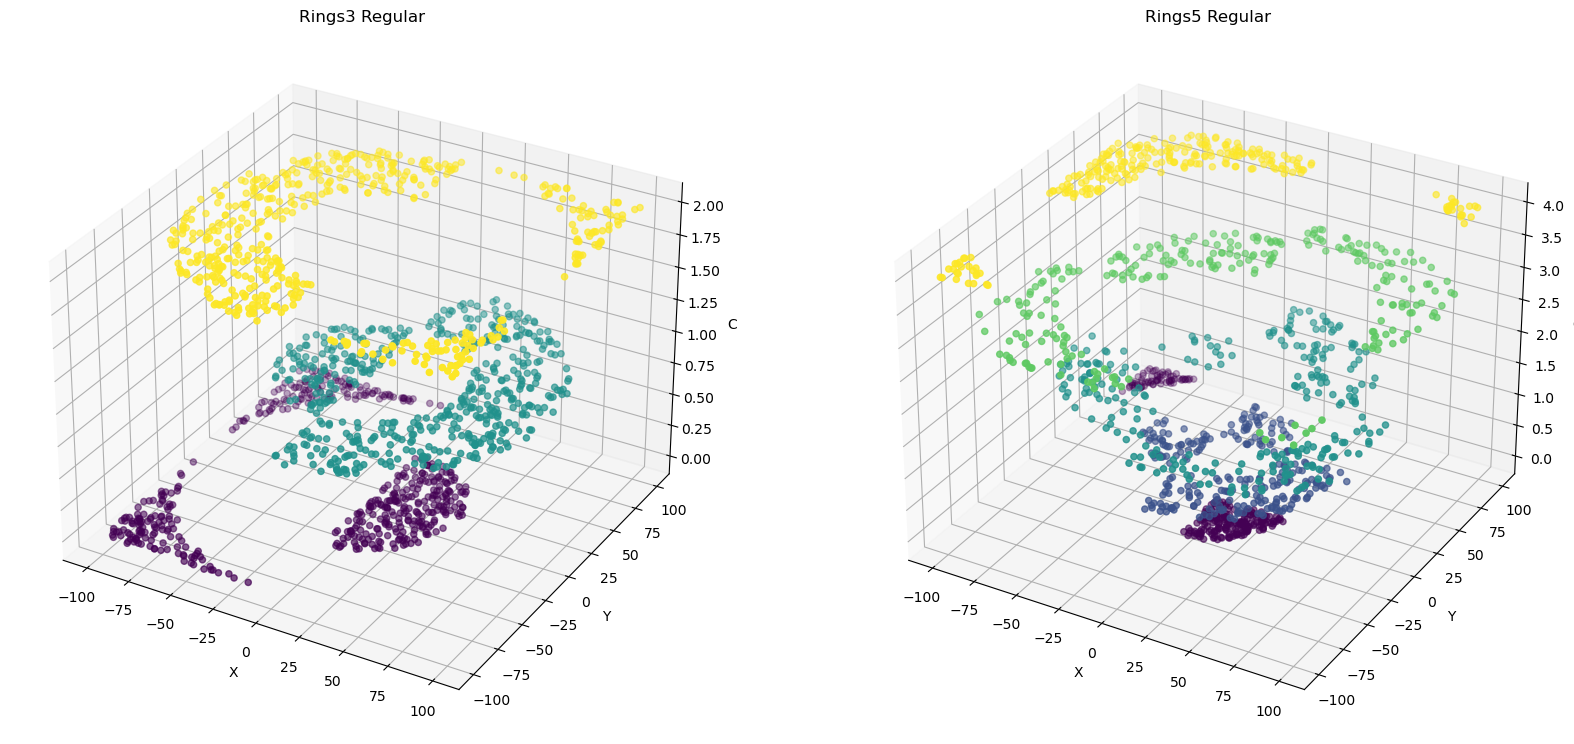

In [14]:
# DANE - KLASYFIKACJA

rings5_regular_test = pd.read_csv('rings5-regular-test.csv')[['x', 'y', 'c']]
rings5_regular_test_x, rings5_regular_test_y, rings5_regular_test_c = rings5_regular_test['x'].values.reshape(-1, 1), rings5_regular_test['y'].values.reshape(-1, 1), rings5_regular_test['c'].values.reshape(-1, 1)
rings5_regular_train = pd.read_csv('rings5-regular-training.csv')[['x', 'y', 'c']]
rings5_regular_train_x, rings5_regular_train_y, rings5_regular_train_c = rings5_regular_train['x'].values.reshape(-1, 1), rings5_regular_train['y'].values.reshape(-1, 1), rings5_regular_train['c'].values.reshape(-1, 1)
print(f'Size of the Rings3 Regular: {len(rings3_regular_train)}')
print(f'Size of the Rings5 Regular: {len(rings5_regular_train)}')
fig, axes = plt.subplots(1, 2, figsize=(20, 10), subplot_kw={'projection': '3d'})
plot_3d_subplot(axes[0], rings3_regular_train_x, rings3_regular_train_y, rings3_regular_train_c, title='Rings3 Regular')
plot_3d_subplot(axes[1], rings5_regular_train_x, rings5_regular_train_y, rings5_regular_train_c, title='Rings5 Regular')

plt.show()

XY_rings5_regular_train = rings5_regular_train[['x', 'y']].to_numpy()
c_rings5_regular_train = one_hot_encode(rings5_regular_train['c'])
XY_rings5_regular_test = rings5_regular_test[['x', 'y']].to_numpy()
c_rings5_regular_test = one_hot_encode(rings5_regular_test['c'])

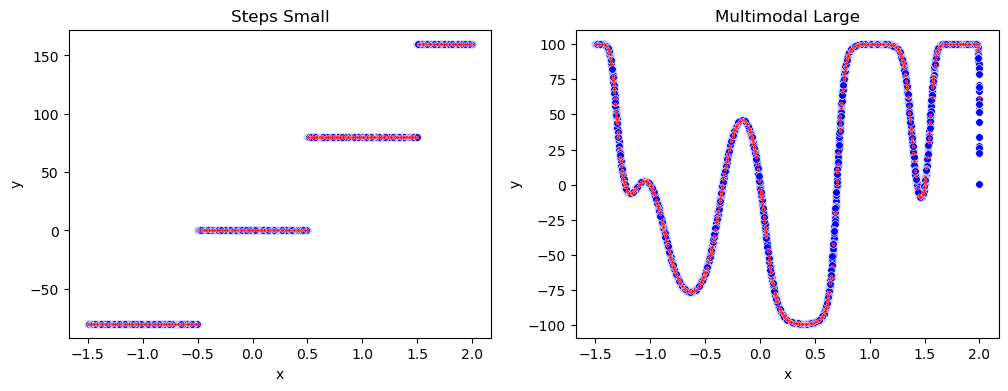

In [15]:
# DANE REGRESJA

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.scatterplot(data=steps_large_train, x='x', y='y', ax=axes[0], color='blue', s=30)
sns.scatterplot(data=steps_large_test, x='x', y='y', ax=axes[0], color='red', s=5)
axes[0].set_title('Steps Small')

sns.scatterplot(data=multimodal_large_train, x='x', y='y', ax=axes[1], color='blue', s=30)
sns.scatterplot(data=multimodal_large_test, x='x', y='y', ax=axes[1], color='red', s=5)
axes[1].set_title('Multimodal Large')
plt.show()

# Funkcje aktywacji

## Sigmoid

Sigmoid jest funkcją aktywacji, która przekształca wartości wejściowe na wartości wyjściowe w zakresie od 0 do 1. Jest to użyteczne w przypadku, gdy chcemy mieć prawdopodobieństwo jako wyjście, ponieważ wartości wyjściowe są ograniczone do tego zakresu.

$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

## Linear

Funkcja liniowa (linear) jest najprostszą funkcją aktywacji. Po prostu zwraca wartość wejściową bez żadnych przekształceń. Jest użyteczna w warstwie wyjściowej, gdy oczekujemy wartości numerycznych.

$$ f(z) = z $$

## ReLU (Rectified Linear Unit)

ReLU jest jedną z najpopularniejszych funkcji aktywacji. Zwraca zero, jeśli wartość wejściowa jest ujemna, w przeciwnym razie zwraca samą wartość wejściową. Jest to szybka i skuteczna funkcja aktywacji.

$$ f(z) = \max(0, z) $$

## Softmax

Softmax jest używany przede wszystkim w warstwie wyjściowej, gdy model ma przewidywać prawdopodobieństwa dla wielu klas. Funkcja ta przekształca wartości wejściowe na wartości w zakresie od 0 do 1, a suma wszystkich wartości wyjściowych wynosi 1. Jest to przydatne, gdy chcemy uzyskać rozkład prawdopodobieństwa dla różnych klas.

Matematycznie, funkcja Softmax jest zdefiniowana jako:

$$ \text{softmax}(z)_i = \frac{e^{z_i - \max(z)}}{\sum_{j=1}^{K} e^{z_j - \max(z)}} $$

gdzie $ K $ to liczba klas, a $ z_i $ to wartość wyjściowa dla klasy $ i $. Ale to już mieliśmy opisane w rozdziale z klasyfikacją.

## Wizualizacja różnorodności funkcji
### <span style="color:orange"> Uwaga: <span>
Poprawność dopasowania oraz wynik MSE nie powinny mieć tutaj znaczenia, gdyż każda funkcja aktywacji może lepiej lub gorzej radzić sobie z różnymi zadaniami. Wykresy, na których należy się skupić, powinny zobracować zasadę działania / różnorodność funkcji. Taki fakt jak to, że sigmoid zdaje się radzić tutaj najlepiej wynika z typu zadania (ale jak wiemy typy mogą znacznie się różnić). Prosta regresja najlepiej po prostu może zapewnić zrozumienie tych bytów.
## <span style="color:lightblue">  Sigmoid </span>

Training complete. | MSE Train:    21.03 | Percentage:   100.00%


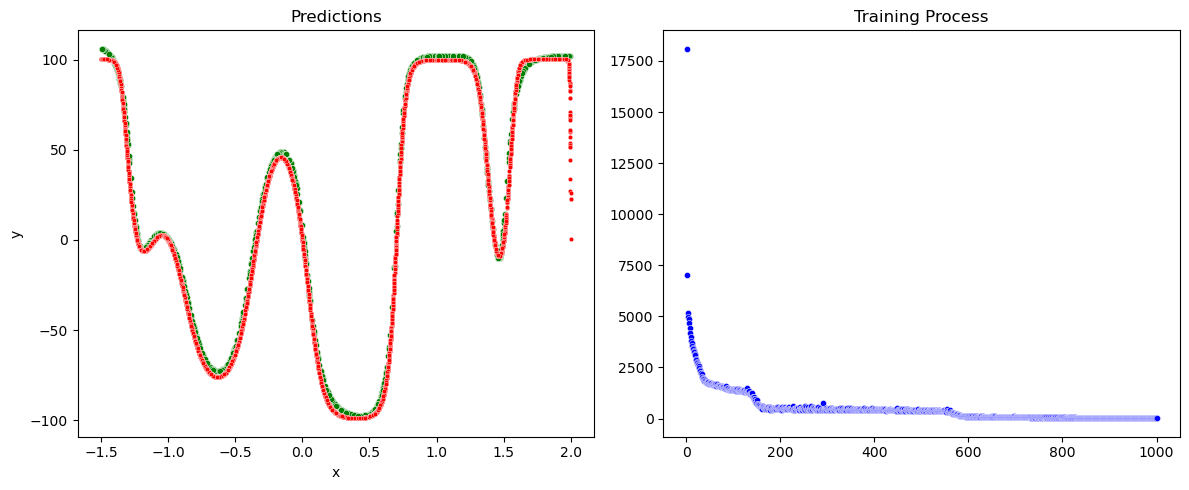

In [ ]:
ml = NN([1, 10, 10, 10, 1], initalization='xavier', activations='sigmoid')
y_norm_ml, parameters_ml = standardize_data(ML_Train_y)
ml.train(ML_Train_X, y_norm_ml, ML_Test_X, ML_Test_y, denormalize=parameters_ml,
         learning_rate=0.01, epochs=1000, batch_size=0.1,
         beta=0.9,
         target=9)

ml.plot_combined(ML_Test_X, parameters_ml, multimodal_large_train)

## <span style="color:lightblue"> Linear </span>

Training complete. | MSE Train:  4403.29 | Percentage:   100.00%


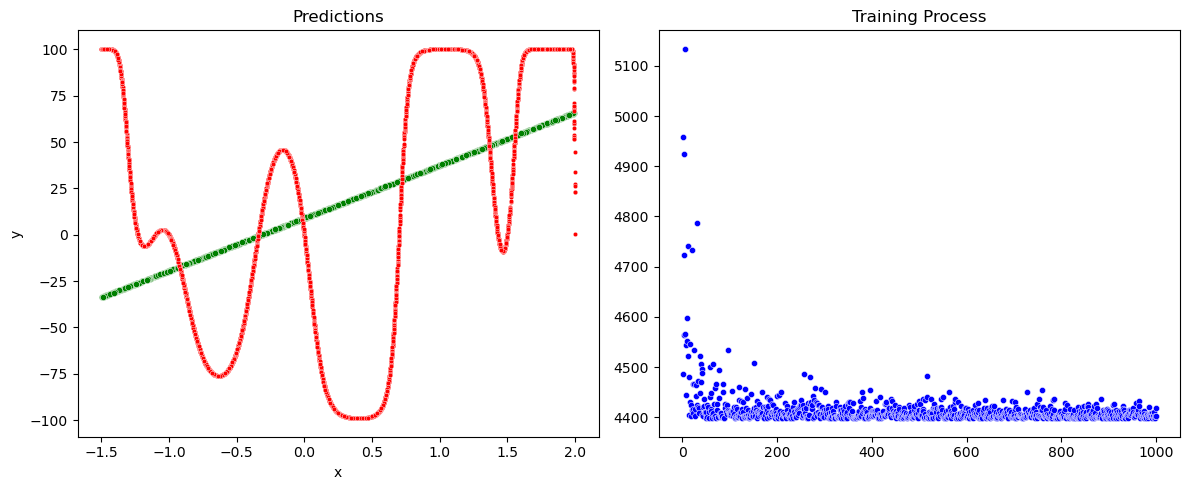

In [ ]:
ml = NN([1, 10, 10, 10, 1], initalization='xavier', activations='linear')
y_norm_ml, parameters_ml = standardize_data(ML_Train_y)
ml.train(ML_Train_X, y_norm_ml, ML_Test_X, ML_Test_y, denormalize=parameters_ml,
         learning_rate=0.01, epochs=1000, batch_size=0.1,
         beta=0.9,
         target=9)

ml.plot_combined(ML_Test_X, parameters_ml, multimodal_large_train)

## <span style="color:lightblue"> ReLU </span>

Training complete. | MSE Train:  1521.54 | Percentage:   100.00%


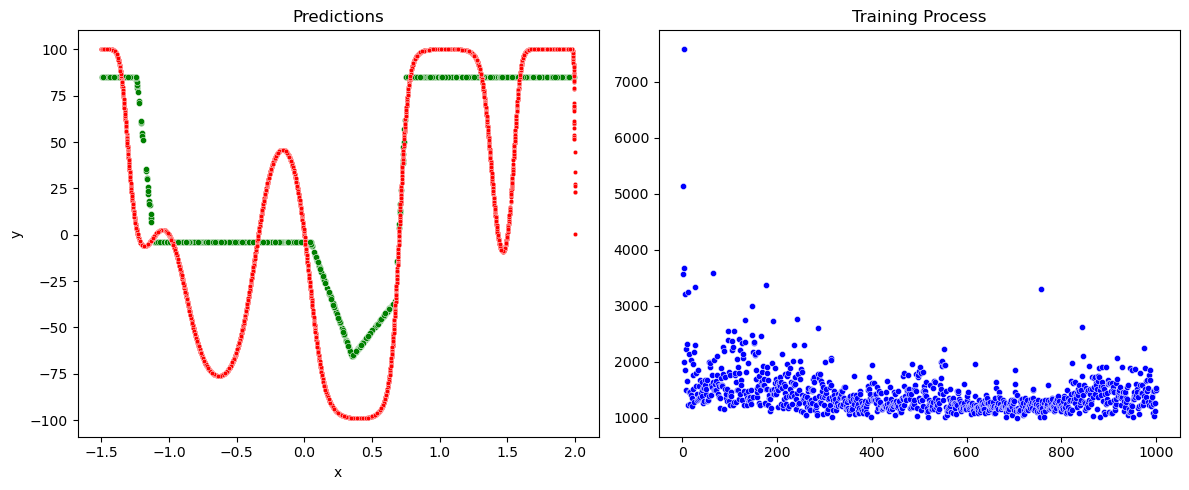

In [ ]:
ml = NN([1, 10, 10, 10, 1], initalization='xavier', activations='relu')
y_norm_ml, parameters_ml = standardize_data(ML_Train_y)
ml.train(ML_Train_X, y_norm_ml, ML_Test_X, ML_Test_y, denormalize=parameters_ml,
         learning_rate=0.1, epochs=1000, batch_size=0.1,
         beta=0.9,
         target=9)

ml.plot_combined(ML_Test_X, parameters_ml, multimodal_large_train)

## <span style="color:lightblue"> tanh </span>


Training complete. | MSE Train:   155.56 | Percentage:   100.00%


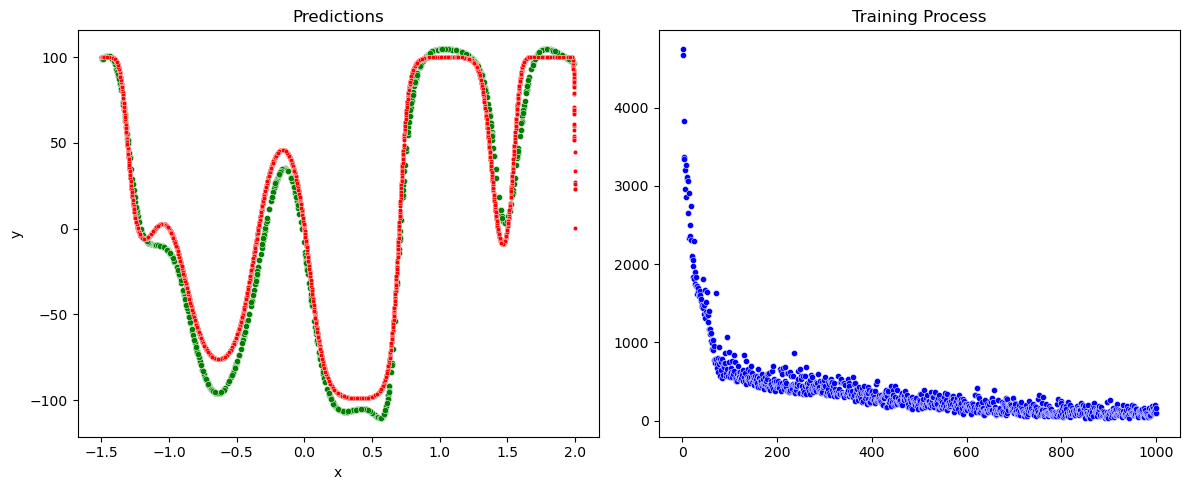

In [ ]:
ml = NN([1, 10, 10, 10, 1], initalization='xavier', activations='tanh')
y_norm_ml, parameters_ml = standardize_data(ML_Train_y)
ml.train(ML_Train_X, y_norm_ml, ML_Test_X, ML_Test_y, denormalize=parameters_ml,
         learning_rate=0.01, epochs=1000, batch_size=0.1,
         beta=0.9,
         target=9)

ml.plot_combined(ML_Test_X, parameters_ml, multimodal_large_train)

#### Podczas wykonywanych powyżej testów bazowaliśmy na konkretnych danych, dla których (przy odgórnie wybranych parametrach) funkcje aktywacji 'sigmoid' okazały się najlepsze. Jednak po wizualizacjach innych funkcji można było stwierdzić, że do innego rodzaju danych poszczególne funkcje mogą sobie radzić znacznie lepiej od pozostałych. Przykładem jest tutaj funkcja ReLU dla danych Steps Large.

Training complete. | MSE Train:    13.44 | Percentage:    13.61%


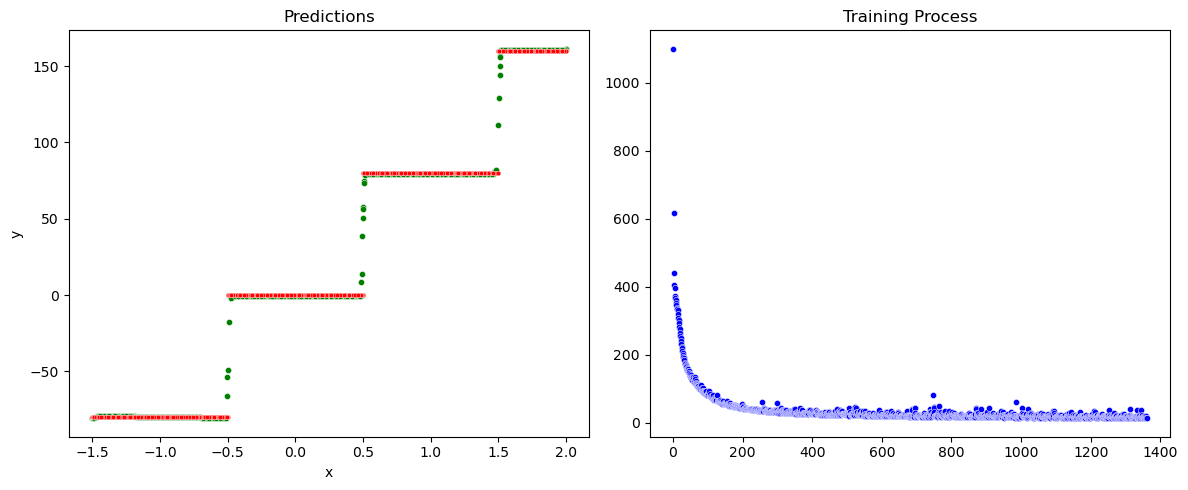

In [ ]:
# ReLU dla Steps Large
sl = NN([1, 10, 10, 1], initalization='xavier', activations='relu')
y_norm_sl, parameters_sl = standardize_data(Steps_Large_Train_y)
sl.train(Steps_Large_Train_X, y_norm_sl, Steps_Large_Test_X, Steps_Large_Test_y, denormalize=parameters_sl,
         learning_rate=1, epochs=10000, batch_size=0.1,
         velocity=0.9,
         target=9)

sl.plot_combined(Steps_Large_Test_X, parameters_sl, steps_large_train)

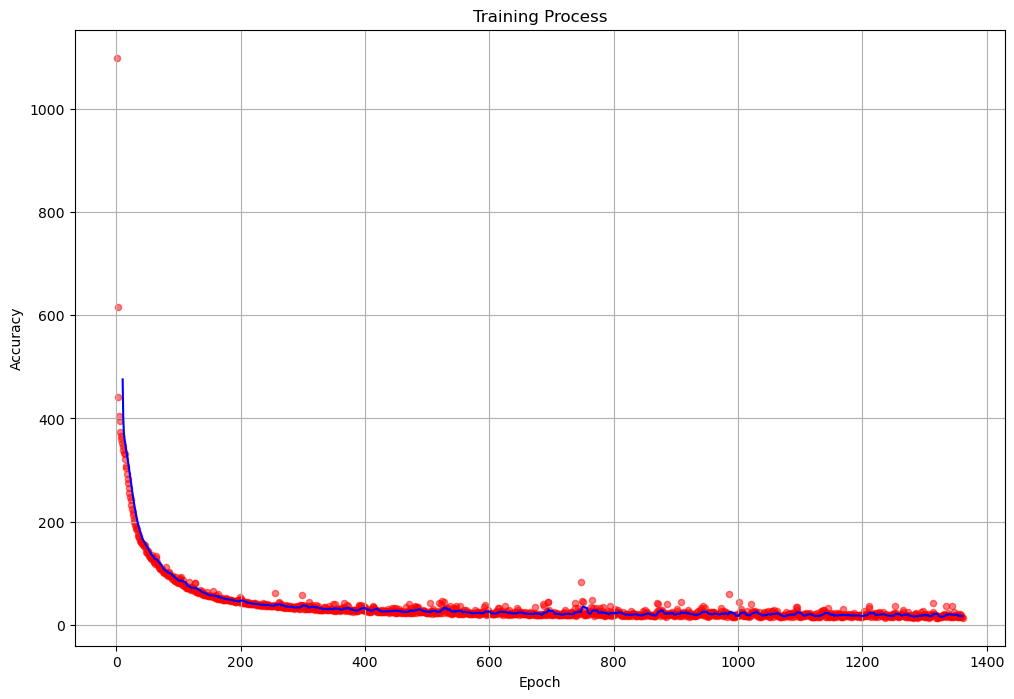

In [ ]:
sl.plot_training_process(10)

## <span style="color:#458dc8"> 7.1 Zjawisko przeuczenia <span>

Size of the Rings3 Balance: 2060
Size of the Rings5 Sparse: 200
Size of the Xor3 Balance: 1050


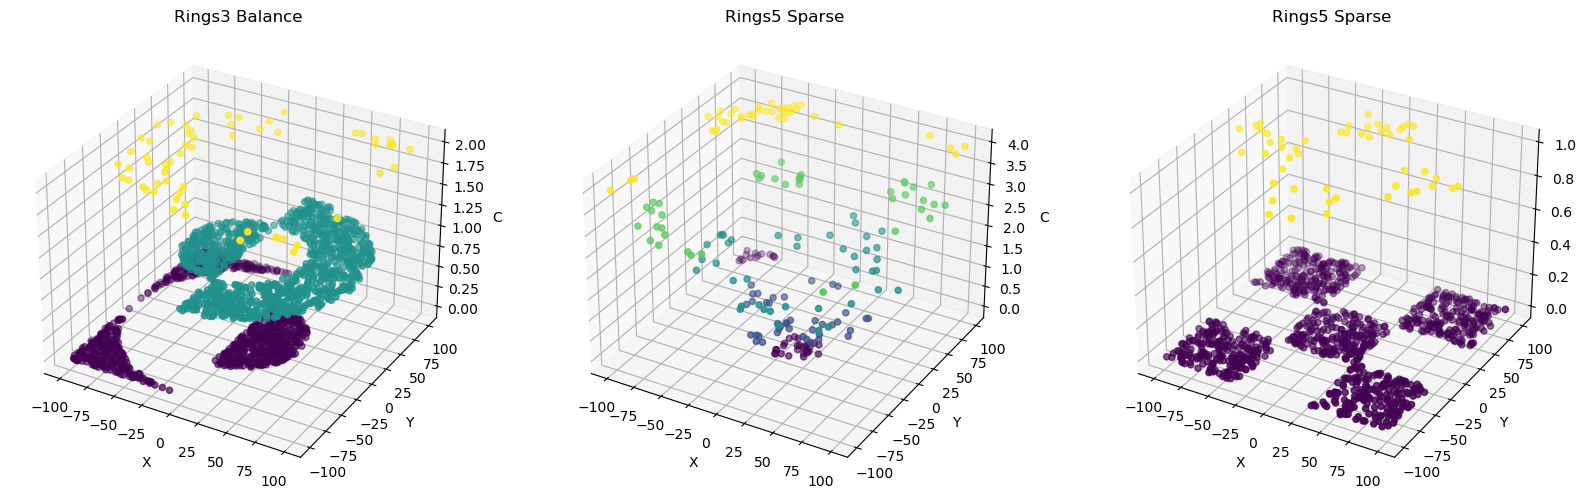

In [16]:
# DANE
rings3_balance_test = pd.read_csv('rings3-balance-test.csv')[['x', 'y', 'c']]
rings3_balance_test_x, rings3_balance_test_y, rings3_balance_test_c = rings3_balance_test['x'].values.reshape(-1, 1), rings3_balance_test['y'].values.reshape(-1, 1), rings3_balance_test['c'].values.reshape(-1, 1)
rings3_balance_train = pd.read_csv('rings3-balance-training.csv')[['x', 'y', 'c']]
rings3_balance_train_x, rings3_balance_train_y, rings3_balance_train_c = rings3_balance_train['x'].values.reshape(-1, 1), rings3_balance_train['y'].values.reshape(-1, 1), rings3_balance_train['c'].values.reshape(-1, 1)

rings5_sparse_test = pd.read_csv('rings5-sparse-test.csv')[['x', 'y', 'c']]
rings5_sparse_test_x, rings5_sparse_test_y, rings5_sparse_test_c = rings5_sparse_test['x'].values.reshape(-1, 1), rings5_sparse_test['y'].values.reshape(-1, 1), rings5_sparse_test['c'].values.reshape(-1, 1)
rings5_sparse_train = pd.read_csv('rings5-sparse-training.csv')[['x', 'y', 'c']]
rings5_sparse_train_x, rings5_sparse_train_y, rings5_sparse_train_c = rings5_sparse_train['x'].values.reshape(-1, 1), rings5_sparse_train['y'].values.reshape(-1, 1), rings5_sparse_train['c'].values.reshape(-1, 1)

xor3_balance_test = pd.read_csv('xor3-balance-test.csv')[['x', 'y', 'c']]
xor3_balance_test_x, xor3_balance_test_y, xor3_balance_test_c = xor3_balance_test['x'].values.reshape(-1, 1), xor3_balance_test['y'].values.reshape(-1, 1), xor3_balance_test['c'].values.reshape(-1, 1)
xor3_balance_train = pd.read_csv('xor3-balance-training.csv')[['x', 'y', 'c']]
xor3_balance_train_x, xor3_balance_train_y, xor3_balance_train_c = xor3_balance_train['x'].values.reshape(-1, 1), xor3_balance_train['y'].values.reshape(-1, 1), xor3_balance_train['c'].values.reshape(-1, 1)

print(f'Size of the Rings3 Balance: {len(rings3_balance_train)}')
print(f'Size of the Rings5 Sparse: {len(rings5_sparse_train)}')
print(f'Size of the Xor3 Balance: {len(xor3_balance_train)}')

fig, axes = plt.subplots(1, 3, figsize=(20, 10), subplot_kw={'projection': '3d'})

plot_3d_subplot(axes[0], rings3_balance_train_x, rings3_balance_train_y, rings3_balance_train_c, title='Rings3 Balance')
plot_3d_subplot(axes[1], rings5_sparse_train_x, rings5_sparse_train_y, rings5_sparse_train_c, title='Rings5 Sparse')
plot_3d_subplot(axes[2], xor3_balance_train_x, xor3_balance_train_y, xor3_balance_train_c, title='Rings5 Sparse')

plt.show()

XY_rings3_balance_train = rings3_balance_train[['x', 'y']].to_numpy()
c_rings3_balance_train = one_hot_encode(rings3_balance_train['c'])
XY_rings3_balance_test = rings3_balance_test[['x', 'y']].to_numpy()
c_rings3_balance_test = one_hot_encode(rings3_balance_test['c'])

XY_rings5_sparse_train = rings5_sparse_train[['x', 'y']].to_numpy()
c_rings5_sparse_train = one_hot_encode(rings5_sparse_train['c'])
XY_rings5_sparse_test = rings5_sparse_test[['x', 'y']].to_numpy()
c_rings5_sparse_test = one_hot_encode(rings5_sparse_test['c'])

XY_xor3_balance_train = xor3_balance_train[['x', 'y']].to_numpy()
c_xor3_balance_train = one_hot_encode(xor3_balance_train['c'])
XY_xor3_balance_test = xor3_balance_test[['x', 'y']].to_numpy()
c_xor3_balance_test = one_hot_encode(xor3_balance_test['c'])

Zjawisko przeuczenia występuje, gdy model sieci neuronowej staje się zbyt dopasowany do danych treningowych, co prowadzi do pogorszenia jego zdolności do generalizacji na nowe dane. Główne cechy przeuczenia to:

- **Wysoki błąd treningowy, niski błąd walidacyjny**: Model dobrze radzi sobie z danymi treningowymi, ale słabo generalizuje na nowe dane.
- **Nadmierna złożoność modelu**: Model może być zbyt skomplikowany w stosunku do ilości dostępnych danych, co prowadzi do uczenia się szumów.

Jest to dobrze widoczne dla wykresów MSE/Fmeasure od epoch, gdzie funkcja zaczyna wzrastać/spadać.

# <span style="color:#458dc8"> 7.2. Finalna Klasa NN <span>

In [ ]:
# Funkcje aktywacji i ich pochodne
activation_functions = {
    'sigmoid': lambda z: 1 / (1 + np.exp(-z)),
    'linear': lambda z: z,
    'relu' : lambda z: np.maximum(0, z),
    'softmax' : lambda z: np.exp(z - np.max(z)) / np.exp(z - np.max(z)).sum(axis=1, keepdims=True),
    'tanh': lambda z: np.tanh(z)

}

derivative_activation_functions = {
    "sigmoid": lambda x: x * (1 - x),
    "linear": lambda x: 1,
    "relu": lambda x: (x > 0).astype(float),
    "tanh": lambda x: 1 - np.tanh(x)**2 
}

# Funkcje inicjalizacji wag
initialization_functions = {
    'xavier': lambda n_in, n_out=None: np.random.normal(0, np.sqrt(1. / n_out if n_out is not None else 1. / n_in), (n_in, n_out) if n_out is not None else n_in),
    'he': lambda n_in, n_out=None: np.random.normal(0, np.sqrt(2. / n_in), (n_in, n_out) if n_out is not None else n_in),
    'uniform': lambda n_in, n_out=None: np.random.uniform(0, 1, (n_in, n_out) if n_out is not None else n_in),
}

# Klasa reprezentująca sztuczną sieć neuronową
class NN:
    def __init__(self, architecture, activations='sigmoid', initalization='uniform', model_type='regression', activation_output='linear'):
        """
        Inicjalizacja sztucznej sieci neuronowej.
        Parameters:
        architecture (list): Lista liczby neuronów w każdej warstwie.
        activations (str): Rodzaj funkcji aktywacji używanej we wszystkich warstwach poza ostatnią.
        initialization (str): Metoda inicjalizacji wag.
        """
        self.architecture = architecture
        self.num_layers = len(architecture)
        self.training_process = [[], []]  # Przechowywanie procesu uczenia
        self.weights_history = []  # Historia wag
        self.model_type = model_type # Typ modelu
        if self.architecture[-1] == 1 and model_type != 'regression':
            raise Exception('Determining regression is possible only with one-dimensional output. Change the architecture.')

        # Wybór funkcji inicjalizacji wag
        self.init_function = initialization_functions[initalization]
        # Inicjalizacja wag i biasów
        self.weights = [self.init_function(architecture[i-1], architecture[i]) for i in range(1, self.num_layers)]
        self.biases = [self.init_function(architecture[i]) for i in range(1, self.num_layers)]

        # Kojarzy mi się z velocity dla momentum. Inicjalizacja też tutaj dla RMSProp
        self.s_weights = [np.zeros_like(w) for w in self.weights]
        self.s_biases = [np.zeros_like(b) for b in self.biases]

        # Dobór funkcji na outpucie w zależności od modelu
        #if model_type == 'regression':
        #    activation_output = 'linear'
        #elif model_type == 'classification':
        #    activation_output = 'softmax'

        # Wybór funkcji aktywacji
        self.activations = [activations for i in range(1, self.num_layers - 1)] + [activation_output]
        self.activation_funcs = list(map(lambda x: activation_functions.get(x), [activations for i in range(1, self.num_layers - 1)] + [activation_output]))


    def record_weights(self):
        """Zapisuje bieżące wagi sieci."""
        self.weights_history.append([w.copy() for w in self.weights])


    def forward(self, a, return_activations=False):
        """
        Przekazuje dane przez sieć w kierunku od wejścia do wyjścia.
        Parameters:
        a (numpy.ndarray): Wejście sieci.
        return_activations (bool): Określa, czy zwracać aktywacje na każdej warstwie.
        Returns:
        numpy.ndarray: Wyjście sieci.
        """        
        activations = [a] if return_activations else None
        
        for w, b, func in zip(self.weights, self.biases, self.activation_funcs):
            a = func(np.dot(a, w)+b)
            if return_activations:
                activations.append(a)
        return activations if return_activations else a
    
    
    def MSE(self, X, y, denormalize=None):
        """
        Oblicza błąd średniokwadratowy dla danych wejściowych i oczekiwanych wyjść.
        Parameters:
        X (numpy.ndarray): Dane wejściowe.
        y (numpy.ndarray): Oczekiwane wyjścia.
        denormalize (tuple): Tuple zawierający parametry do denormalizacji danych.
        Returns:
        float: Błąd średniokwadratowy.
        """
        predictions = self.forward(X)
        if denormalize:
            predictions = destandardize_data(predictions, denormalize)
        return np.mean((predictions - y) ** 2)
    
    
    def fmeasure(self, X, y):
        """
        Oblicza miarę F dla modelu na podstawie danych wejściowych i oczekiwanych wyjść.
        Parameters:
        X (numpy.ndarray): Dane wejściowe.
        y (numpy.ndarray): Oczekiwane wyjścia.
        Returns:
        float: Miera F dla modelu na podstawie danych wejściowych i oczekiwanych wyjść.
        """
        predictions = self.forward(X)
        predictions = predictions.flatten()
        y = y.flatten()
        
        unique_classes = np.unique(y)
        predictions_new = np.array([unique_classes[np.argmin(np.abs(unique_classes - prediction))] for prediction in predictions])
        predictions_new = predictions_new.astype(y.dtype)

        true_positives = np.sum(np.equal(predictions_new, y))
        precision = true_positives / len(predictions_new)
        recall = true_positives / np.sum(np.isin(y, predictions_new))
        if precision + recall == 0:
            return 0
        fmeasure = 2 * (precision * recall) / (precision + recall)
        return fmeasure


    def backward(self, X, y, learning_rate, sigma, beta, epsilon):
        """Propagacja wsteczna"""
        # sigma: szybkość dla momentum
        # beta: współczynnik zapominania dla RMSProp
        # epsilon: anty-zero
        activations = self.forward(X, return_activations=True)
        deltas = [None] * len(self.weights)
        deltas[-1] = activations[-1] - y
        
        for i in reversed(range(len(deltas) - 1)):
            delta_func = derivative_activation_functions[self.activations[i]]
            deltas[i] = np.dot(deltas[i+1], self.weights[i+1].T) * delta_func(activations[i+1])
        
        length = len(self.weights)
        weights_gradient = [None] * length
        biases_gradient = [None] * length
        
        for i in range(length):
            weights_gradient[i] = np.dot(activations[i].T, deltas[i])
            biases_gradient[i] = np.sum(deltas[i], axis=0)

        if sigma is None:
            sigma = 0
                
        m = len(X)
        for i in range(len(self.weights)):
            weights_gradient = np.dot(activations[i].T, deltas[i])
            biases_gradient = np.sum(deltas[i], axis=0)
            # Aktualizacja wag
            if beta is not None:
                # RMSProp
                # Tutaj learning rate nie jest dzielony przez len(X). Wygodniej i sprawniej bez tego
                self.s_weights[i] = beta * self.s_weights[i] + (1 - beta) * np.square(weights_gradient)
                self.s_biases[i] = beta * self.s_biases[i] + (1 - beta) * np.square(biases_gradient)
                self.weights[i] -= (learning_rate / ((np.sqrt(self.s_weights[i] + epsilon)))) * weights_gradient
                self.biases[i] -= (learning_rate / ((np.sqrt(self.s_biases[i] + epsilon)))) * biases_gradient
            else:
                # Momentum
                self.s_weights[i] = sigma * self.s_weights[i] + (1 - sigma) * weights_gradient
                self.s_biases[i] = sigma * self.s_biases[i] + (1 - sigma) * biases_gradient
                self.weights[i] -= (learning_rate / m) * self.s_weights[i]
                self.biases[i] -= (learning_rate / m) * self.s_biases[i]


    def create_batches(self, X, y, batch_size):
        """
        Tworzy batche danych wejściowych i oczekiwanych wyjść.
        Parameters:
        X (numpy.ndarray): Dane wejściowe.
        y (numpy.ndarray): Oczekiwane wyjścia.
        batch_size (int): Rozmiar batcha.
        Returns:
        tuple: Tuple zawierający batche danych wejściowych i oczekiwanych wyjść.
        """
        size = len(X)
        indices = np.arange(size)
        np.random.shuffle(indices)
        # Tutaj wsadzamy procent, jeżeli nie znamy wielkości zbioru
        if batch_size <= 1:
            batch_size = round(size*batch_size)
        
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        
        X_mini_batches = [X_shuffled[i:i+batch_size] for i in range(0, size, batch_size)]
        y_mini_batches = [y_shuffled[i:i+batch_size] for i in range(0, size, batch_size)]
        return X_mini_batches, y_mini_batches
    

    def train(self, X, y, X_test, y_test, denormalize=None,       # Dane
              learning_rate=0.01, epochs=10000, batch_size=None,  # Podstawowe zmienne
              velocity=None, beta=None, epsilon=1e-8,             # Zmienne dla gradientów
              target=None, update_rate=1, auto_stop=False):       # Dodatkowe
        """
        Trenuje sieć neuronową.
        Parameters:
        X (numpy.ndarray): Dane treningowe.
        y (numpy.ndarray): Oczekiwane wyjścia dla danych treningowych.
        X_test (numpy.ndarray): Dane testowe.
        y_test (numpy.ndarray): Oczekiwane wyjścia dla danych testowych.
        learning_rate (float): Współczynnik uczenia.
        epochs (int): Liczba epok.
        batch_size (int): Rozmiar batcha.
        denormalize (tuple): Tuple zawierający parametry do denormalizacji danych.
        target (float): Wartość MSE na której chcemy zakończyć uczenie.
        update_rate (int): Częstotliwość aktualizacji wyników. (Przyczynia się do czasu działania)
        velocity (float): Parametr kontrolujący tempo i kierunek aktualizacji wag
        beta (float): Parametr dla RMSProp
        epsilon (float): anty-zero
        auto_stop (int): przeciw przetrenowaniu
        """
        warnings.filterwarnings("ignore", category=RuntimeWarning)      

        if self.model_type != "regression" and target is not None:
            if target > 1:
                print('For classification F-measure must be less than 1')
                return

        if velocity is not None and beta is not None:
            print('You need to choose between simple momentum and RMSProp')
            return
        
        if batch_size is None:
            batch_size = len(X)
        
        y_mse_fmeasure = y
        if denormalize is not None:
            y_mse_fmeasure = destandardize_data(y, denormalize)

        # Do wizualizacji procesu. W print ważne przy określaniu dokładności wyświetlanych wyników
        field_width = 8
        # Do mechanizmu autostop
        means = []
        percent_of_epochs = int(epochs*auto_stop)

        try:
            loss_test = 0
            for epoch in range(1, epochs+1):
                if batch_size < len(X):
                    batches_x, batches_y = self.create_batches(X, y, batch_size)
                    for i in range(len(batches_x)):
                        self.backward(batches_x[i], batches_y[i], learning_rate, velocity, beta, epsilon)
                else:
                    self.backward(X, y, learning_rate, velocity, beta, epsilon)
                
                if (epoch % update_rate) == 0 or epoch == epochs:
                    self.record_weights()
                    if not self.model_type != "regression":
                        loss = self.MSE(X, y_mse_fmeasure, denormalize=denormalize)
                        loss_test = self.MSE(X_test, y_test, denormalize=denormalize)
                        self.training_process[0].append(epoch)
                        self.training_process[1].append(loss)
                        print(f"MSE Test: {loss_test:>{field_width}.2f} | MSE Train: {loss:>{field_width}.2f} | Percentage: {((epoch/epochs)*100):>{field_width}.2f}%", end='\r')
                    elif self.model_type != "regression":
                        loss = self.fmeasure(X, y_mse_fmeasure)
                        loss_test = self.fmeasure(X_test, y_test)
                        self.training_process[0].append(epoch)
                        self.training_process[1].append(loss)
                        print(f"F-measure Test: {loss_test:>{field_width}.4f} | F-measure Train: {loss:>{field_width}.4f} | Percentage: {((epoch/epochs)*100):>{field_width}.2f}%", end='\r')
                        
                    #Dodanie auto_stop
                    if auto_stop:
                        if epoch >= percent_of_epochs:
                            if (epoch - percent_of_epochs)%(percent_of_epochs) == 0:
                                means.append(np.mean(self.training_process[1][-percent_of_epochs:]))
                        if len(means) >= 2:
                            if self.model_type == 'regression':
                                if means[-1] > means[-2]:
                                    print("Expected Overfitting. Needed to stop process.")
                                    return
                            else:
                                if means[-1] < means[-2]:
                                    print("Expected Overfitting. Needed to stop process.")
                                    return

                if target is not None and self.model_type != "regression":
                    if loss_test >= target:
                        return
                if target is not None and not self.model_type != "regression":
                    if loss_test <= target:
                        return
        except KeyboardInterrupt:
            print("\nTraining interrupted. Finalizing...")
        except OverflowError:
            result = None 
        except ValueError as e:
            if "operands could not be broadcast together with shapes" in str(e):
                print("Output dimension probably doesn't match the class count. Change the architecture.")
            else:
                raise e
        finally:
            print("Training complete.")
            if not self.model_type != "regression":
                print(f"Final MSE: {loss_test:>{field_width-3}.2f}", end='\r') 
            elif self.model_type != "regression":
                print(f"Final F-measure: {loss_test:>{field_width-3}.2f}", end='\r') 

                

    # Funkcje wizualizacyjne
    def plot_combined(self, X, parameters=None, data=None):
        """
        Wyświetla wykresy predykcji oraz procesu trenowania.
        Parameters:
        X (numpy.ndarray): Dane wejściowe.
        """
        if not self.model_type != "regression":
            fig, axes = plt.subplots(1, 2, figsize=(12, 5))
            predictions = []
            for x in X:
                predictions.append(self.forward(x)[-1])
            predictions = self.forward(X)
            if X.ndim > 1:
                X = X[:, 0]
            # Na zielono predykcje, na czerwono dane trenujące
            predictions = destandardize_data(np.squeeze(predictions), parameters)
            sns.scatterplot(x=X, y=predictions, color='green', s=20, ax=axes[0])
            sns.scatterplot(data=data, x='x', y='y', ax=axes[0], color='red', s=10)

            axes[0].set_title('Predictions')

            if len(self.training_process[0]) == 0:
                print('You need to train model')
            else:
                sns.scatterplot(x=self.training_process[0], y=self.training_process[1], color='blue', s=20, ax=axes[1])
                axes[1].set_title('Training Process')

            plt.tight_layout()
            plt.show()
        else:
            array = self.forward(X)
            means = [np.sum(row * np.arange(len(row))) for row in array]
            mean_values = np.array(means)

            selected_integers = [np.argmax(arr) for arr in array]

            fig = make_subplots(
                rows=1, cols=2,
                specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}]]
            )

            fig.add_trace(go.Scatter3d(
                x=X[:, 0],
                y=X[:, 1],
                z=mean_values,
                mode='markers',
                marker=dict(
                    size=5,
                    color=mean_values,
                    colorscale='Viridis',
                    opacity=0.8
                )
            ), row=1, col=1)

            fig.add_trace(go.Scatter3d(
                x=X[:, 0],
                y=X[:, 1],
                z=selected_integers,
                mode='markers',
                marker=dict(
                    size=5,
                    color=selected_integers,
                    colorscale='Viridis',
                    opacity=0.8
                )
            ), row=1, col=2)
            fig.update_layout(
                title_text='3D plots of Percentage and Classified values',
                width=1100,
                height=550,
            )
            fig.show()

    # New plot function
    def plot_training_process(self, window_size=5, log=False):
        if len(self.training_process[0]) == 0:
            print('You need to train the model')
        else:
            data = pd.DataFrame({
                'Epoch': self.training_process[0],
                'Accuracy': self.training_process[1]
            })
            data['Moving Average'] = data['Accuracy'].rolling(window=window_size).mean()

            plt.figure(figsize=(12, 8))
            sns.lineplot(x='Epoch', y='Moving Average', data=data, color='blue')
            plt.scatter(data['Epoch'], data['Accuracy'], color='red', s=20, alpha=0.5)

            if log:
                plt.yscale('log')

            plt.xlabel('Epoch')
            plt.ylabel('Accuracy')
            plt.title('Training Process')
            plt.grid(True)

            plt.show()          


    def plot_weights(self):
        """Wizualizuje ewolucję wag w czasie."""
        if not self.weights_history:
            print("No weights history to plot. Train the model to generate history.")
            return
        
        fig, axs = plt.subplots(len(self.weights), 1, figsize=(10, len(self.weights) * 3))
        if len(self.weights) == 1:
            axs = [axs]
        
        for i, ax in enumerate(axs):
            weights_layer_i = np.array([weights[i].flatten() for weights in self.weights_history])
            sns.heatmap(weights_layer_i.T, ax=ax, cmap='viridis', cbar=True)
            ax.set_title(f'Layer {i+1} Weights Over Epochs')
            ax.set_xlabel('Epoch')
            ax.set_ylabel('Weight Index')
        
        plt.tight_layout()
        plt.show()

def standardize_data(X):
    """Standaryzuje dane."""
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_new = (X - mean) / std
    return X_new, (mean, std)

def destandardize_data(X, parameters):
    """Denormalizuje dane."""
    return X * parameters[1] + parameters[0]

# | Implementacja
## Testy | Analizy przebiegu uczenia | Finalne modele

In [ ]:
"""Opis mechanizmu autostop"""
# Aby algorytm mógł działać należy podczas treningu wprowadzić wartość dziesiętną 
# 'auto_stop', która jest procentem ilości zadanych epoch. Przy iteracjach algorytm
# sprawdza średnią wartość loss (ze wszystkich rekordów liczności epoch*auto_stop) 
# porównując ją do poprzednio wyznaczonej. Jeżeli dla pierwszej grupy epoch średnia
# loss jest mniejsza co do następnej grupy wtedy interpretujemy to zjawisko jako
# overfitting. Dla klasyfikacji jest to samo tylko odwrotne porównanie

## Multimodal Sparse

Expected Overfitting. Needed to stop process.rcentage:    30.00%

Training complete.


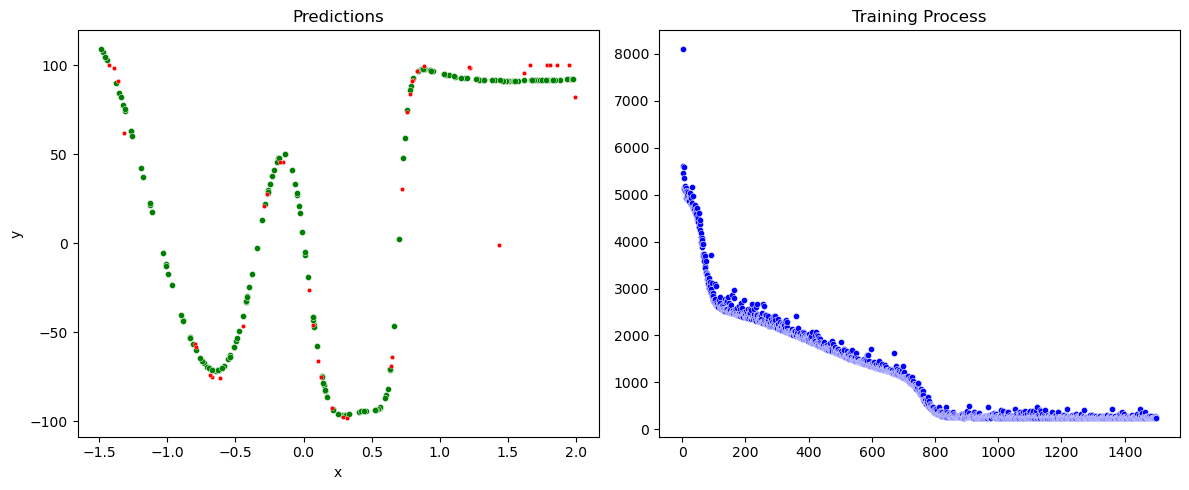

In [ ]:
ml = NN([1, 10, 10, 1], initalization='xavier', activations='sigmoid')
y_norm_ml, parameters_ml = standardize_data(Multimodal_Sparse_Train_y)
ml.train(Multimodal_Sparse_Train_X, y_norm_ml, Multimodal_Sparse_Test_X, Multimodal_Sparse_Test_y, denormalize=parameters_ml,
         learning_rate=0.01, epochs=5000, batch_size=0.1,
         beta=0.9,
         target=9, auto_stop=0.02)

ml.plot_combined(Multimodal_Sparse_Test_X, parameters_ml, multimodal_sparse_train)

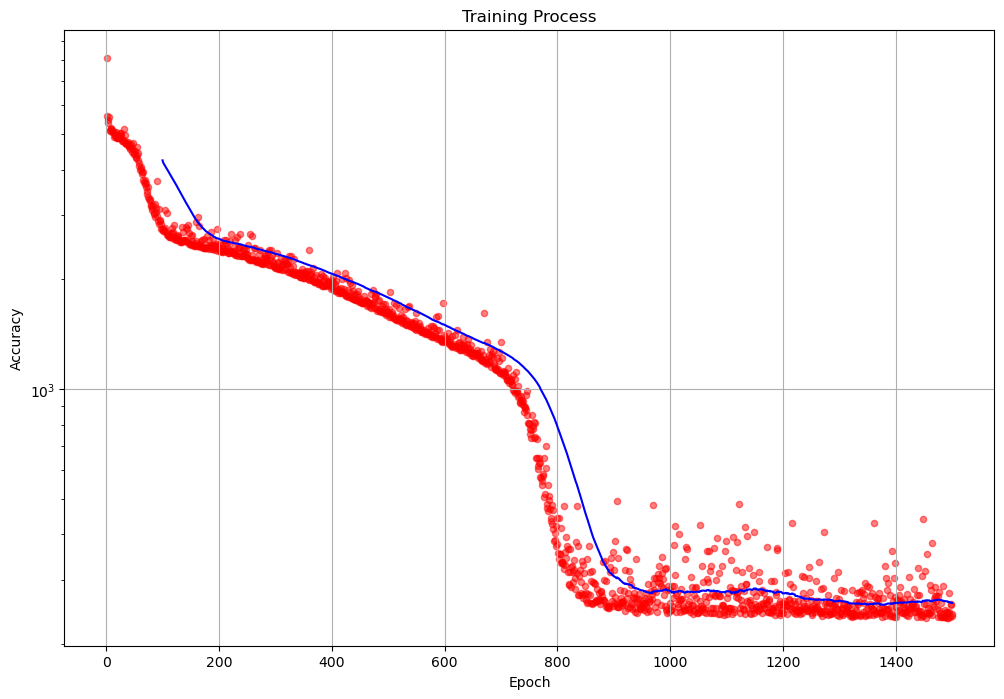

In [ ]:
# 5000 * 0.02 = 100. Dlatego sprawdzamy średnią kroczącą dla 100 i tak jak widzimy po niebieskiej funkcji
# na końcu występuje średni wzrost MSE
ml.plot_training_process(100, log=True)

# Rings3

In [ ]:
r3 = NN([2, 128, 128, 3], initalization='he', model_type='classification', activations='sigmoid', activation_output='softmax')
r3.train(XY_rings3_balance_train, c_rings3_balance_train, XY_rings3_balance_test, c_rings3_balance_test,
         learning_rate=0.01, epochs=500, batch_size=0.4,
         beta=0.9, target=0.8, auto_stop=0.02)

Expected Overfitting. Needed to stop process. 0.8691 | Percentage:    12.00%
Training complete.


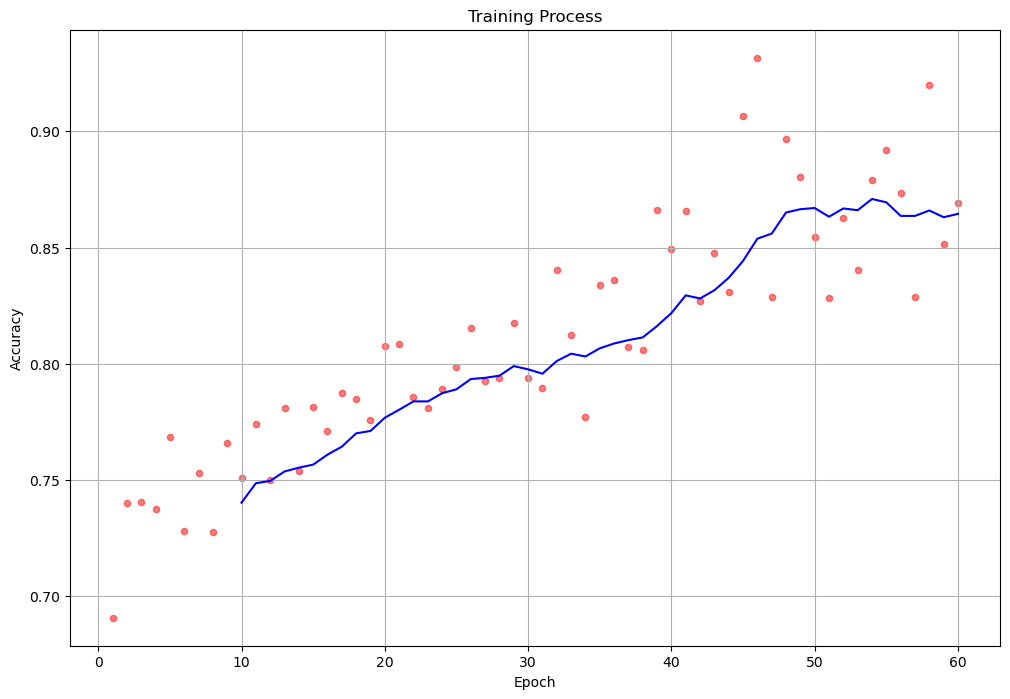

In [ ]:
r3.plot_training_process(10)
# Ponownie mechanizm stopu dobrze zadziałał

# <span style="color:#458dc8"> 8. Podsumowanie <span>

Sieci neuronowe stanowią fascynujące narzędzie, charakteryzujące się szerokim zakresem możliwości modyfikacji i zastosowań. Ich zdolność do uczenia się i adaptacji sprawia, że znajdują one zastosowanie w wielu różnych obszarach, od rozpoznawania obrazów i mowy po przewidywanie trendów i automatyzację zadań.

Mimo że sieci neuronowe oferują imponujące możliwości, ich stosowanie wiąże się także z wyzwaniami, takimi jak potrzeba dużych ilości danych do treningu, potencjalne problemy z interpretowalnością wyników oraz ryzyko nadużyć. Jednakże, ciągły rozwój w tej dziedzinie sugeruje, że przyszłość sieci neuronowych jest obiecująca, z coraz to nowymi metodami i technologiami, które będą pokonywać te przeszkody.

Podsumowując, sieci neuronowe są kluczowym składnikiem nowoczesnej inteligencji obliczeniowej, zapewniającym potężne narzędzia, które transformują sposób, w jaki pracujemy, uczymy się i żyjemy.